In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
#import folium
!pip install squarify
import squarify

#ensure all data is displayed
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)


#remove warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data/london_df.csv')
data.head()

,Unnamed: 0,month,reported by,longitude,latitude,location,lsoa code,lsoa name,crime type,last outcome category,borough_london,stringency,covid
0,0,2018-01,Metropolitan Police Service,0.140035,51.589112,On or near Beansland Grove,1000027,Barking and Dagenham 001A,Burglary,Offender sent to prison,Barking and Dagenham,0.0,0
1,1,2018-01,Metropolitan Police Service,0.140035,51.589112,On or near Beansland Grove,1000027,Barking and Dagenham 001A,Burglary,Investigation complete; no suspect identified,Barking and Dagenham,0.0,0
2,2,2018-01,Metropolitan Police Service,0.135554,51.584985,On or near Rose Lane,1000027,Barking and Dagenham 001A,Burglary,Status update unavailable,Barking and Dagenham,0.0,0
3,3,2018-01,Metropolitan Police Service,0.140035,51.589112,On or near Beansland Grove,1000027,Barking and Dagenham 001A,Burglary,Status update unavailable,Barking and Dagenham,0.0,0
4,4,2018-01,Metropolitan Police Service,0.135554,51.584985,On or near Rose Lane,1000027,Barking and Dagenham 001A,Criminal damage and arson,Investigation complete; no suspect identified,Barking and Dagenham,0.0,0


In [4]:
data.columns

Index(['Unnamed: 0', 'month', 'reported by', 'longitude', 'latitude',
       'location', 'lsoa code', 'lsoa name', 'crime type',
       'last outcome category', 'borough_london', 'stringency', 'covid'],
      dtype='object')

In [5]:
data.drop('Unnamed: 0', inplace=True, axis=1) 

In [6]:
data.shape

(2844241, 12)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2844241 entries, 0 to 2844240
Data columns (total 12 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   month                  object 
 1   reported by            object 
 2   longitude              float64
 3   latitude               float64
 4   location               object 
 5   lsoa code              int64  
 6   lsoa name              object 
 7   crime type             object 
 8   last outcome category  object 
 9   borough_london         object 
 10  stringency             float64
 11  covid                  int64  
dtypes: float64(3), int64(2), object(7)
memory usage: 260.4+ MB


In [8]:
data.describe()

,longitude,latitude,lsoa code,stringency,covid
count,2.844241e+06,2.844241e+06,2.844241e+06,2.844241e+06,2.844241e+06
mean,-1.179504e-01,5.151097e+01,1.004724e+06,2.514905e+01,3.889168e-01
std,1.425669e-01,6.619617e-02,8.076620e+03,3.282504e+01,4.875045e-01
min,-4.976980e-01,5.129442e+01,1.000001e+06,0.000000e+00,0.000000e+00
25%,-1.989330e-01,5.147102e+01,1.001410e+06,0.000000e+00,0.000000e+00
50%,-1.128980e-01,5.151533e+01,1.002714e+06,0.000000e+00,0.000000e+00
75%,-3.126500e-02,5.155411e+01,1.004027e+06,6.430310e+01,1.000000e+00
max,3.071510e-01,5.168717e+01,1.033746e+06,8.748037e+01,1.000000e+00


In [9]:
#check for null values in dataset
data.isna().sum()

month                    0
reported by              0
longitude                0
latitude                 0
location                 0
lsoa code                0
lsoa name                0
crime type               0
last outcome category    0
borough_london           0
stringency               0
covid                    0
dtype: int64

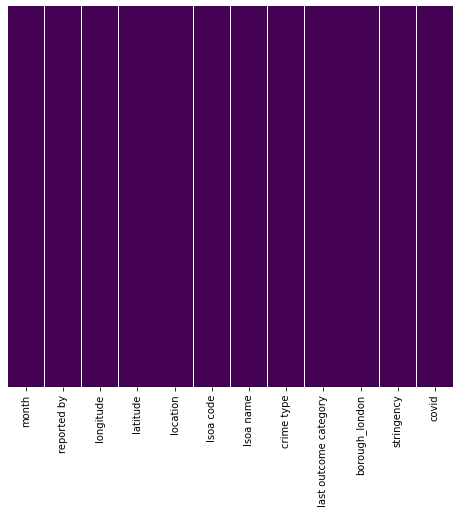

<Figure size 432x288 with 0 Axes>

In [10]:
#visualize the null values
plt.figure(figsize = (8,7))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()
plt.savefig('Missing Values')

### General EDA

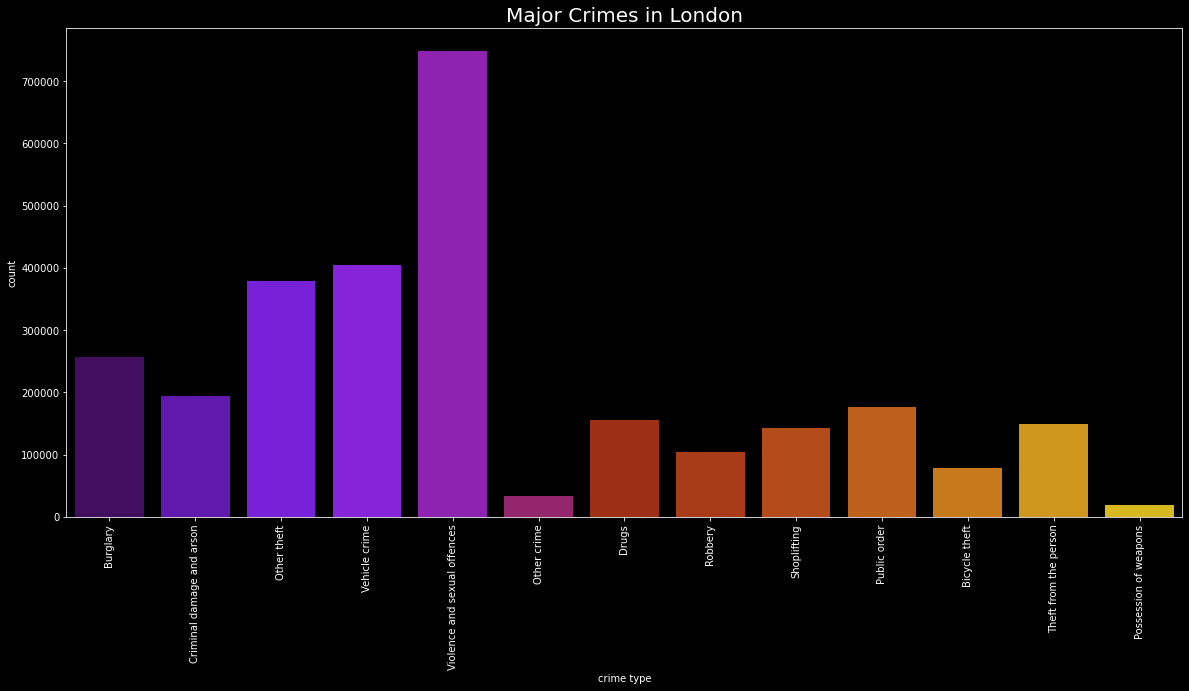

In [11]:
plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('dark_background')

sns.countplot(data['crime type'], palette = 'gnuplot')

plt.title('Major Crimes in London', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 90)
plt.grid(False)
plt.show()

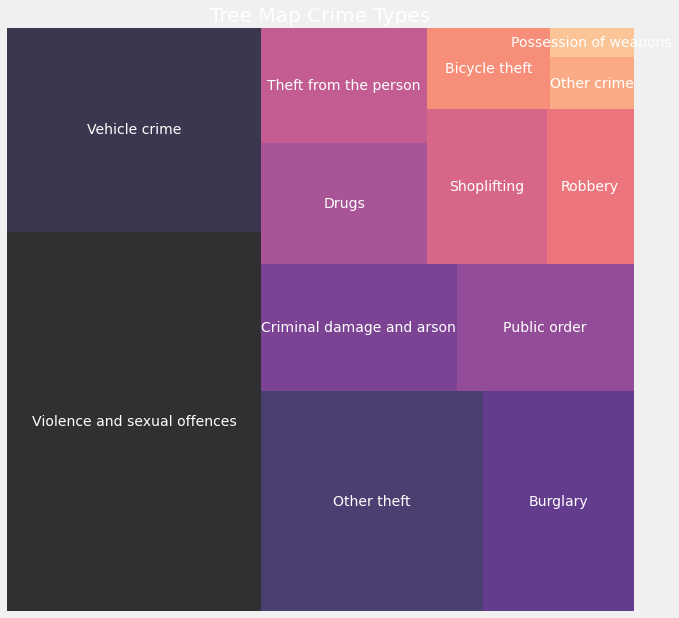

In [12]:
y = data['crime type'].value_counts()
    
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('fivethirtyeight')

color = plt.cm.magma(np.linspace(0, 1, 15))
squarify.plot(sizes = y.values, label = y.index, alpha=.8, color = color)
plt.title('Tree Map Crime Types', fontsize = 20)

plt.axis('off')
plt.show()

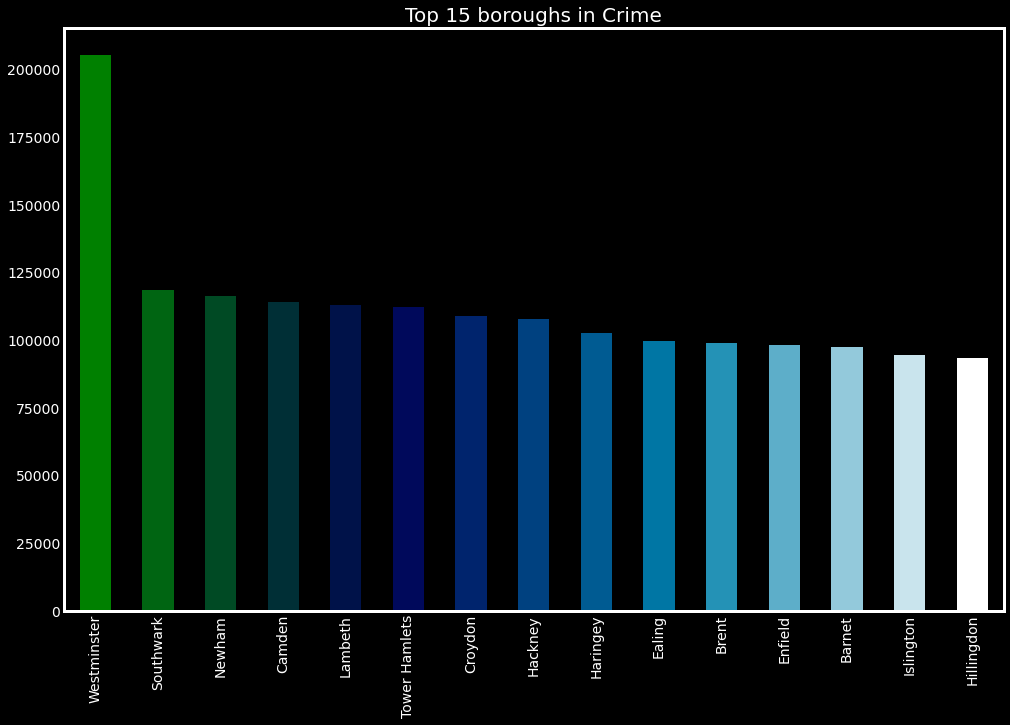

In [13]:
plt.rcParams['figure.figsize'] = (10, 5)
#plt.style.use('seaborn')
plt.style.use('dark_background')

color = plt.cm.ocean(np.linspace(0, 1, 15))
data['borough_london'].value_counts().head(15).plot.bar(color = color, figsize = (15, 10))

plt.title('Top 15 boroughs in Crime',fontsize = 20)

plt.xticks(rotation = 90)
plt.grid(False)

plt.show()

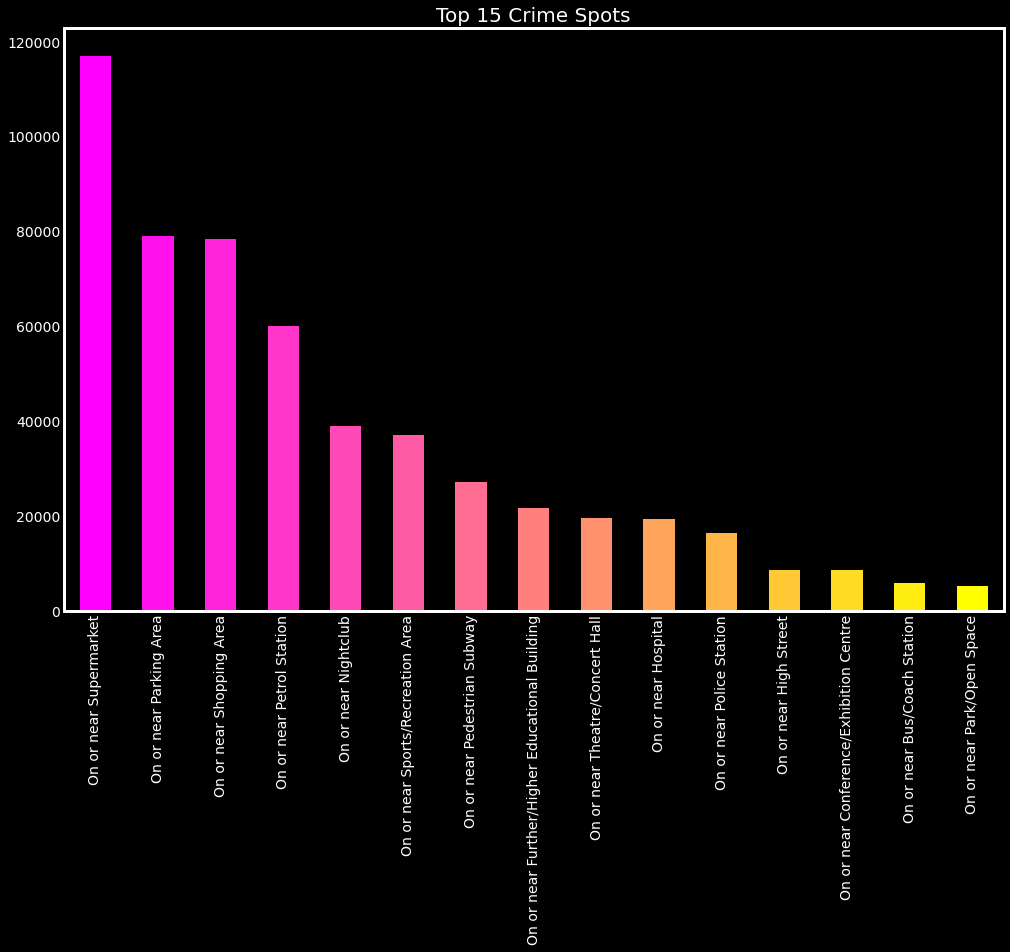

In [14]:
plt.rcParams['figure.figsize'] = (20, 9)
#plt.style.use('seaborn')
plt.style.use('dark_background')

color = plt.cm.spring(np.linspace(0, 1, 15))
data['location'].value_counts().head(15).plot.bar(color = color, figsize = (15, 10))

plt.title('Top 15 Crime Spots',fontsize = 20)

plt.xticks(rotation = 90)
plt.grid(b=None)
plt.show()

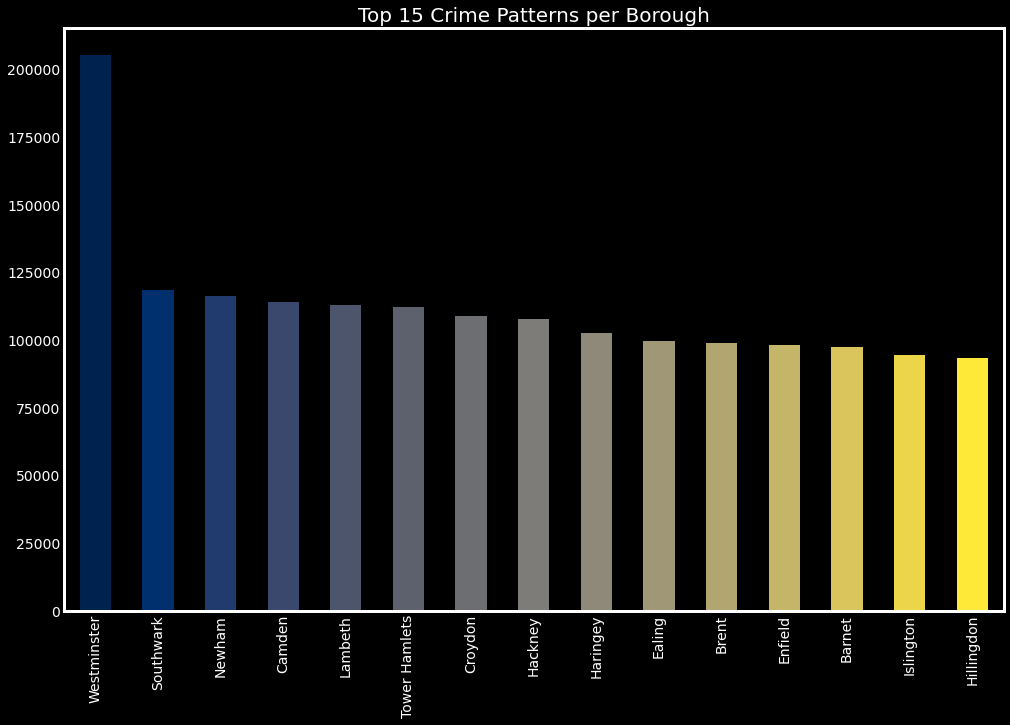

In [73]:
plt.rcParams['figure.figsize'] = (20, 9)
#plt.style.use('seaborn')
plt.style.use('dark_background')

color = plt.cm.cividis(np.linspace(0, 1, 15))
data['borough_london'].value_counts().head(15).plot.bar(color = color, figsize = (15, 10))

plt.title('Top 15 Crime Patterns per Borough',fontsize = 20)

plt.xticks(rotation = 90)
plt.grid(b=None)
plt.show()

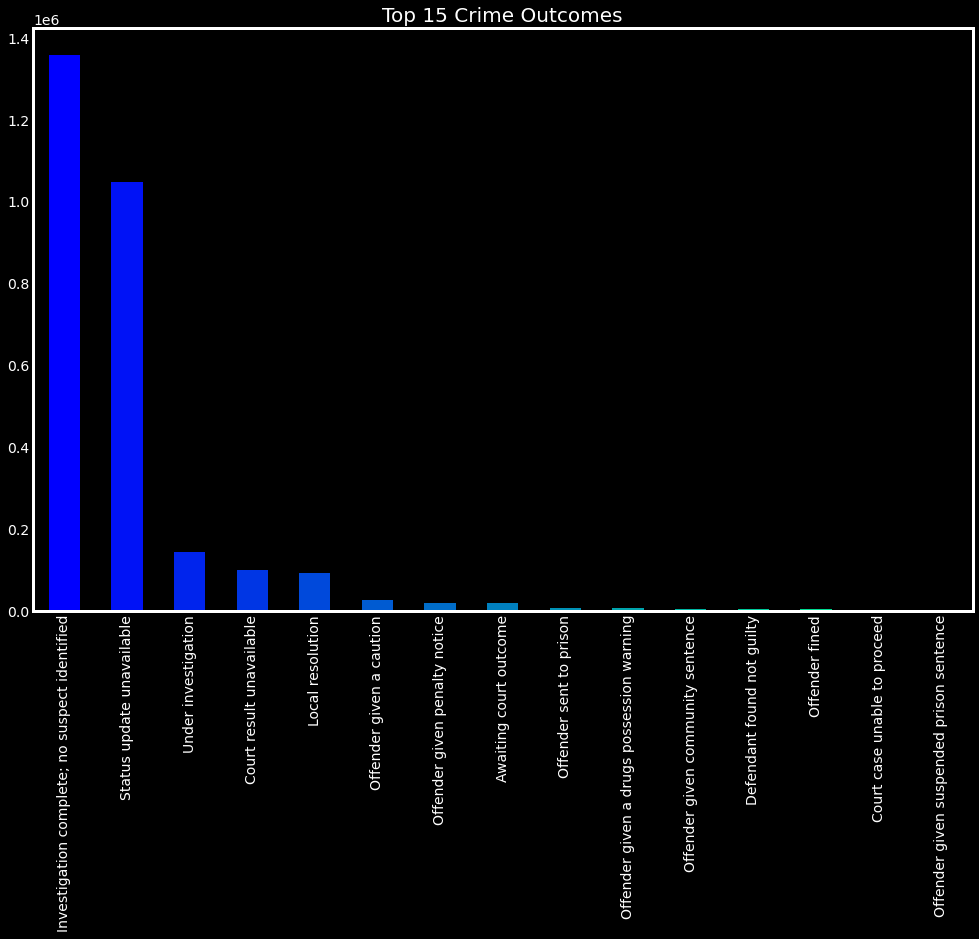

In [15]:
plt.rcParams['figure.figsize'] = (20, 9)
#plt.style.use('seaborn')
plt.style.use('dark_background')

color = plt.cm.winter(np.linspace(0, 1, 15))
data['last outcome category'].value_counts().head(15).plot.bar(color = color, figsize = (15, 10))

plt.title('Top 15 Crime Outcomes',fontsize = 20)

plt.xticks(rotation = 90)
plt.grid(b=None)
plt.show()

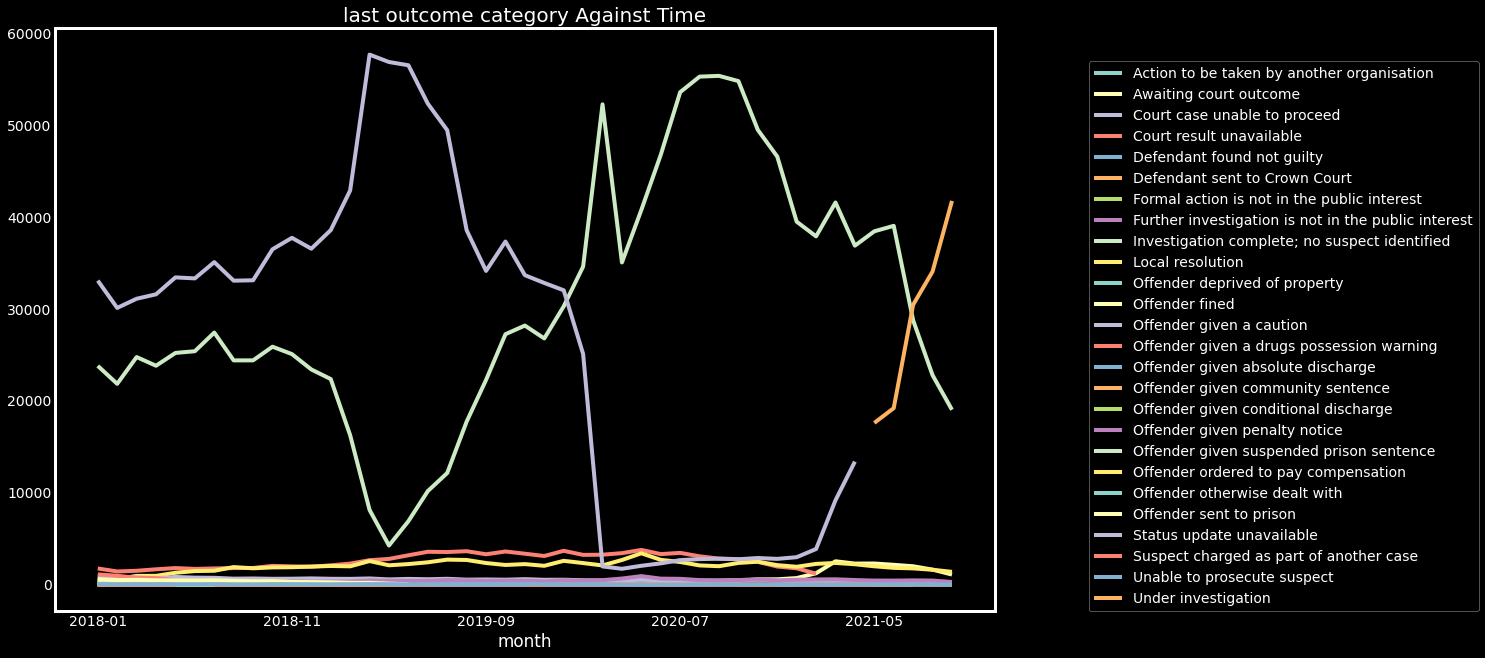

In [16]:
#plt.style.use('seaborn')
plt.style.use('dark_background')
m = data.groupby(['month', 'last outcome category']).size().unstack().plot.line(figsize=(15, 10))
plt.title('last outcome category Against Time',fontsize = 20)
plt.grid(b=None)
m.legend(loc=(1.1,0))

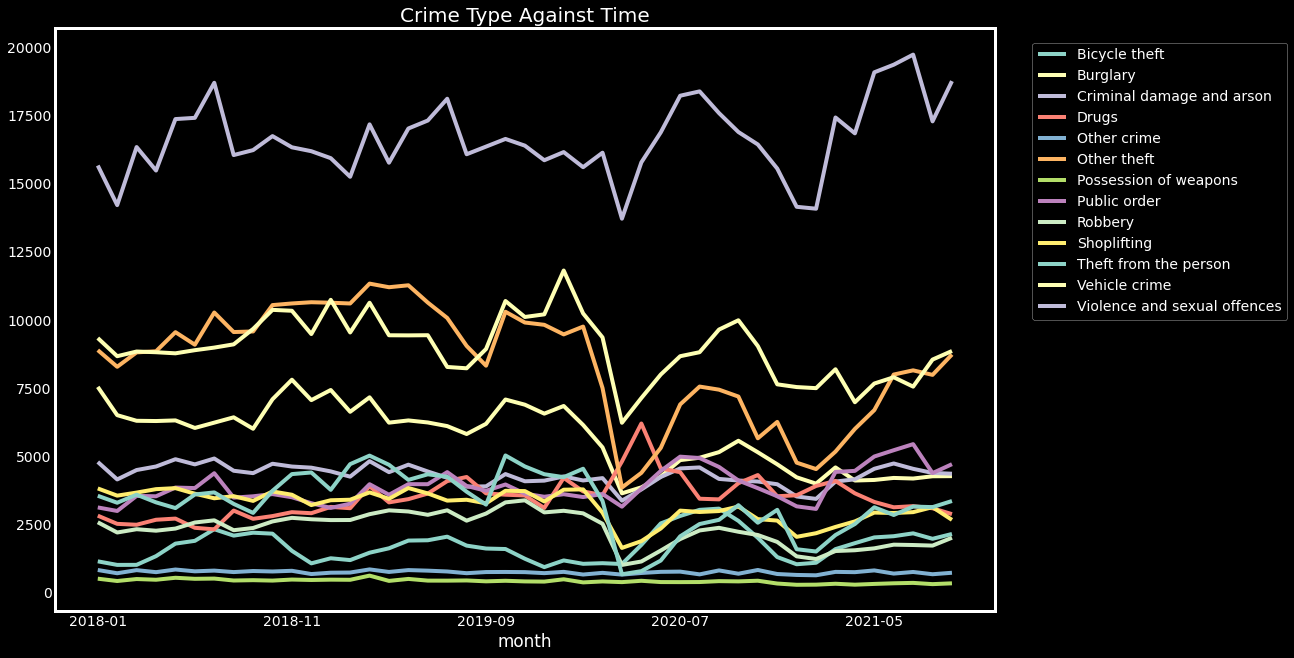

In [17]:
m = data.groupby(['month', 'crime type']).size().unstack().plot.line(figsize=(15, 10))
plt.grid(b=None)

plt.title('Crime Type Against Time',fontsize = 20)

m.legend(loc=(1.04,0.5))

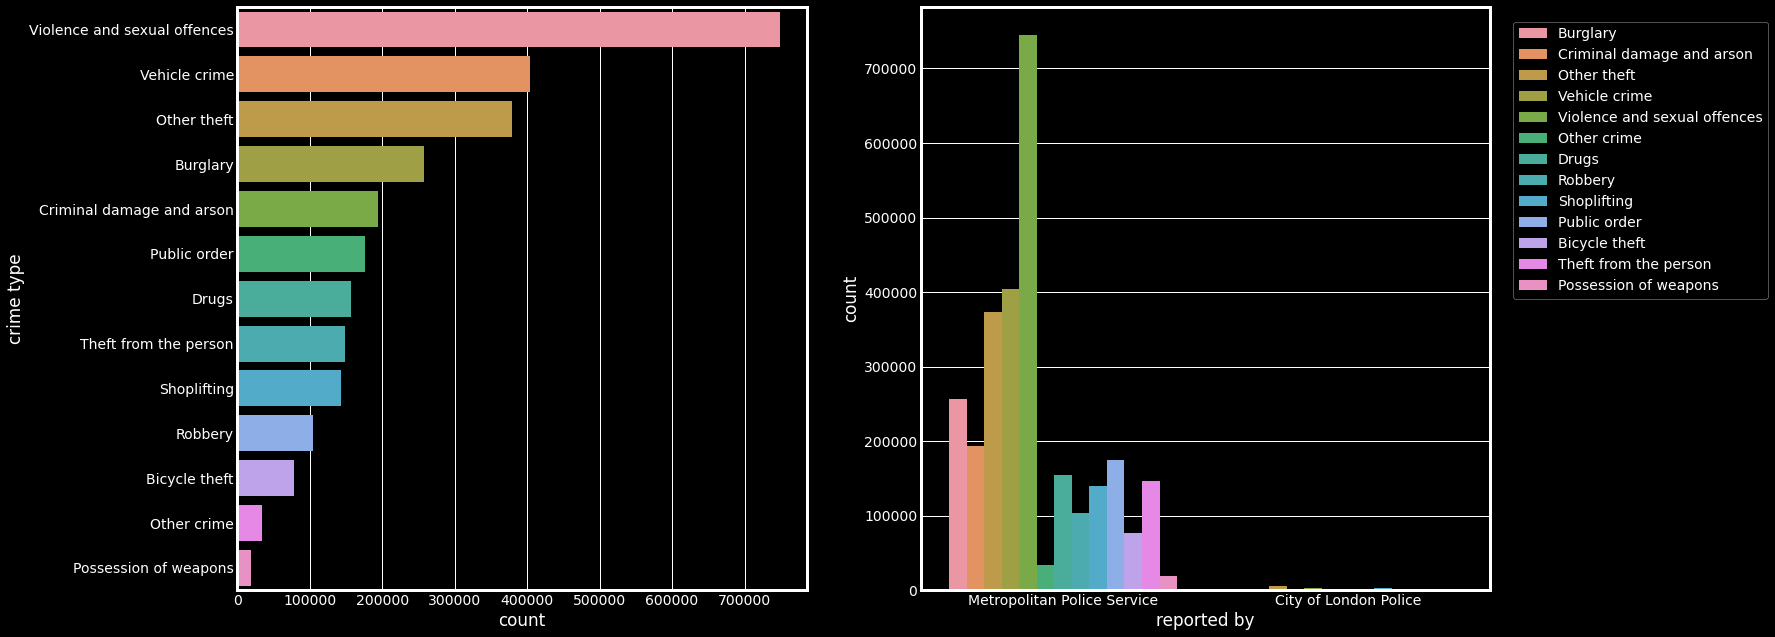

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(20,10))
#sns.set(font_scale = 2)
sns.countplot(y='crime type', data=data, order=data['crime type'].value_counts().index, ax=axs[0])
m = sns.countplot(x='reported by', hue='crime type', data=data, order = data['reported by'].value_counts().index, ax=axs[1] )
m.legend(loc=(1.04,0.5))
#lt.grid(False)
plt.show()

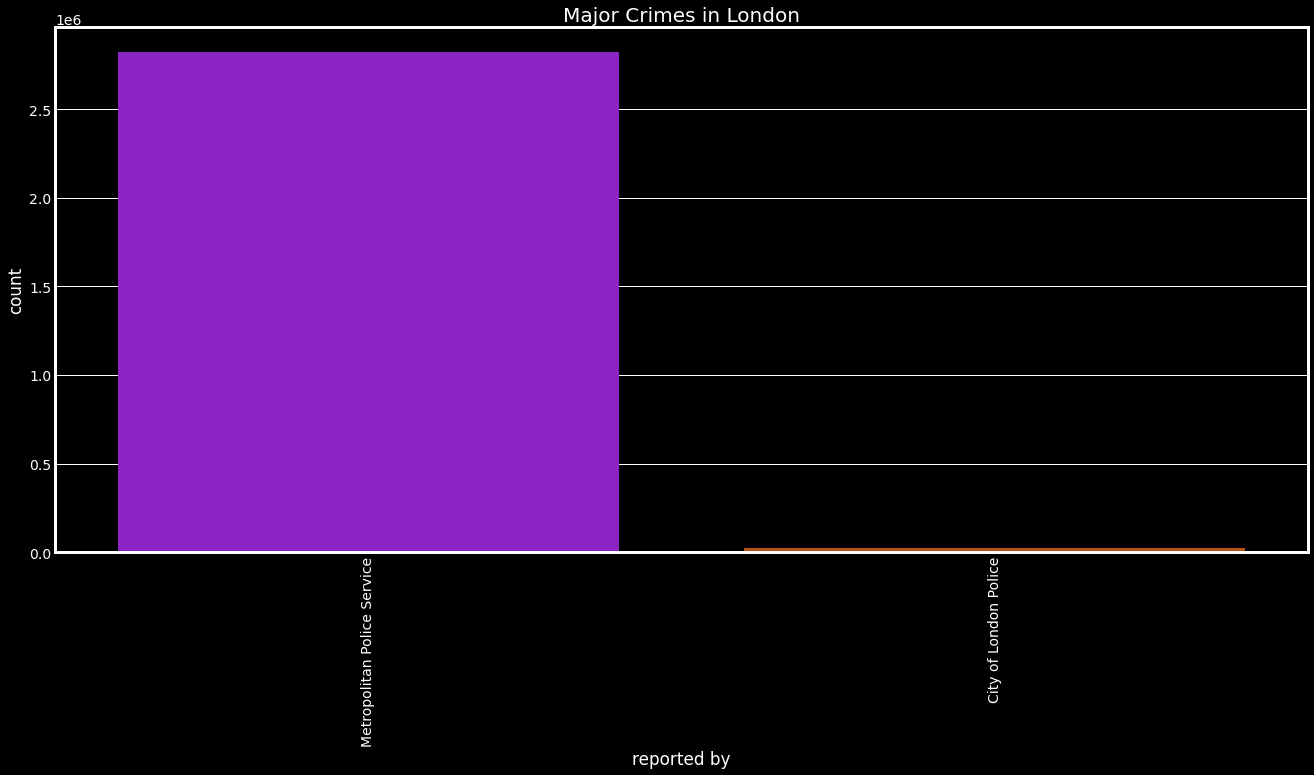

In [19]:
plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('dark_background')

sns.countplot(data['reported by'], palette = 'gnuplot')

plt.title('Major Crimes in London', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 90)
#plt.grid(False)
plt.show()

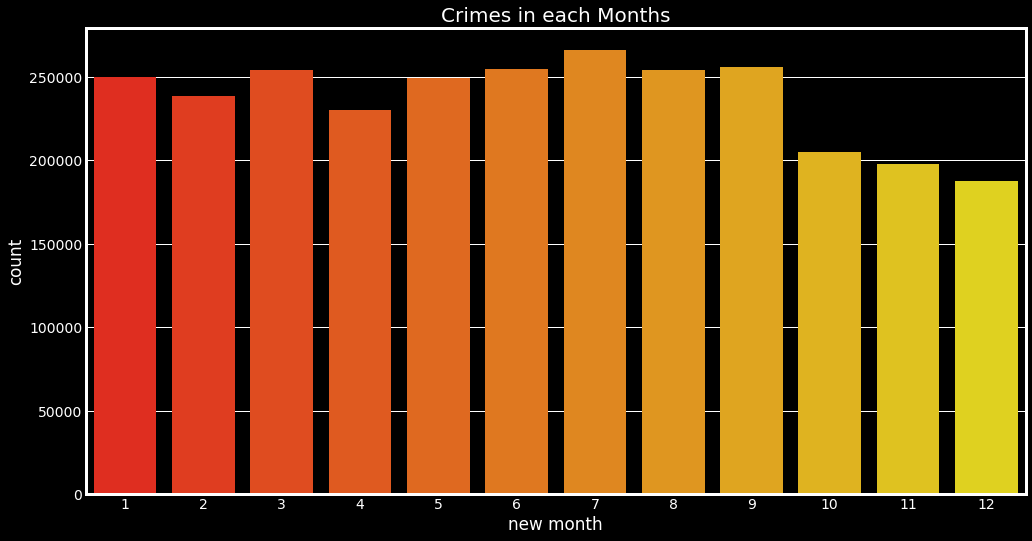

In [20]:
data['month'] = pd.to_datetime(data['month'])

data['new month'] = data['month'].dt.month

#plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (15, 8)

sns.countplot(data['new month'], palette = 'autumn',)
plt.title('Crimes in each Months', fontsize = 20)

plt.show()

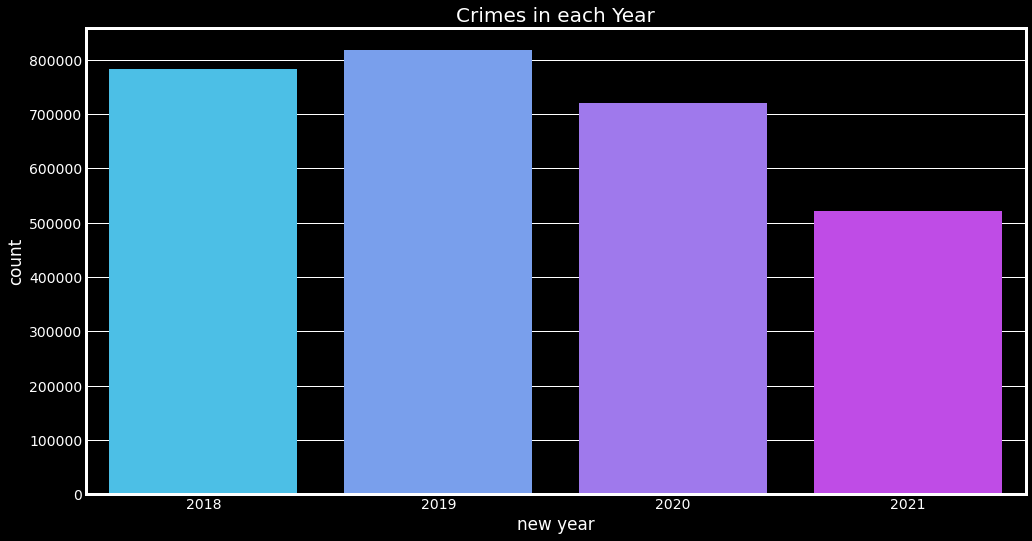

In [21]:
data['month'] = pd.to_datetime(data['month'])

data['new year'] = data['month'].dt.year

#plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (15, 8)

sns.countplot(data['new year'], palette = 'cool',)
plt.title('Crimes in each Year', fontsize = 20)

plt.show()

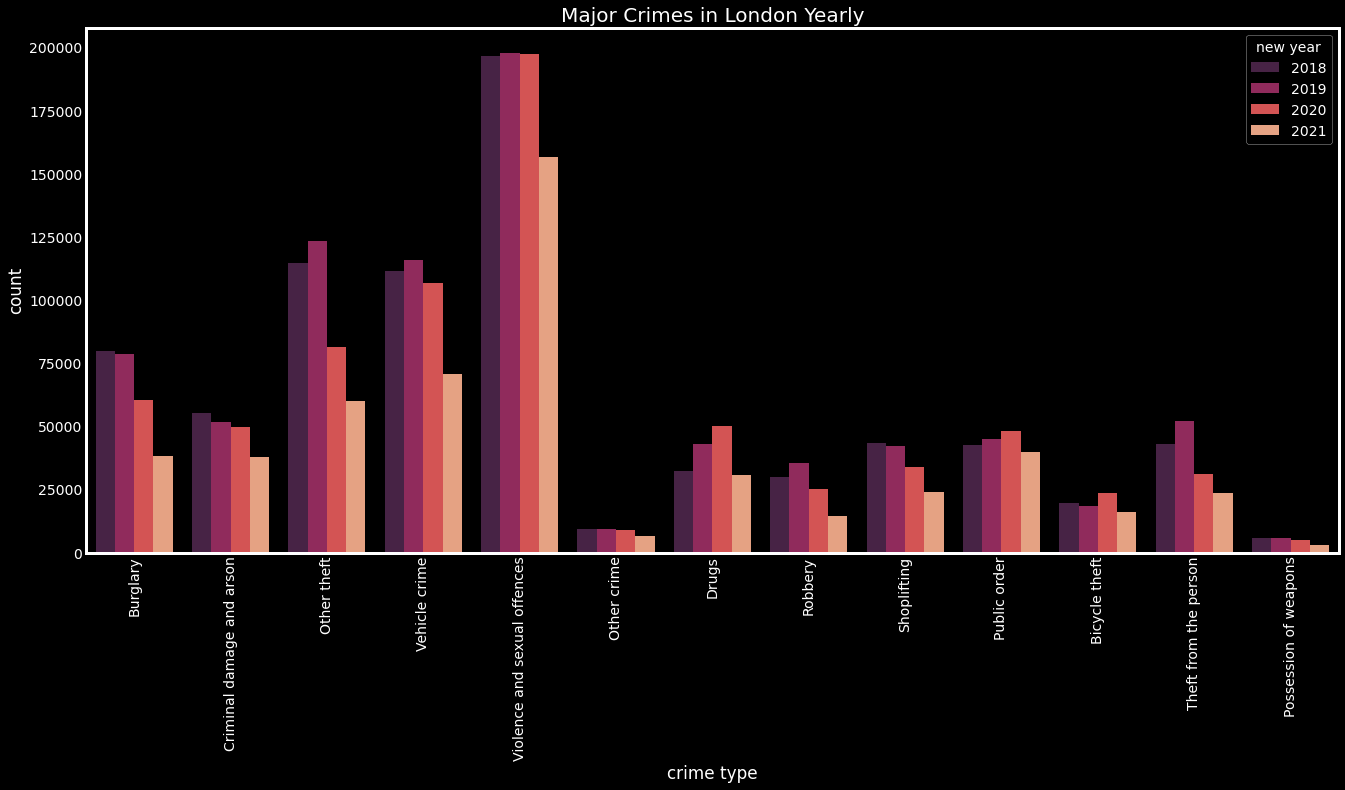

In [82]:
plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('dark_background')

sns.countplot(data['crime type'], hue=data['new year'], palette = 'rocket')

plt.title('Major Crimes in London Yearly', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 90)
plt.grid(False)
plt.show()

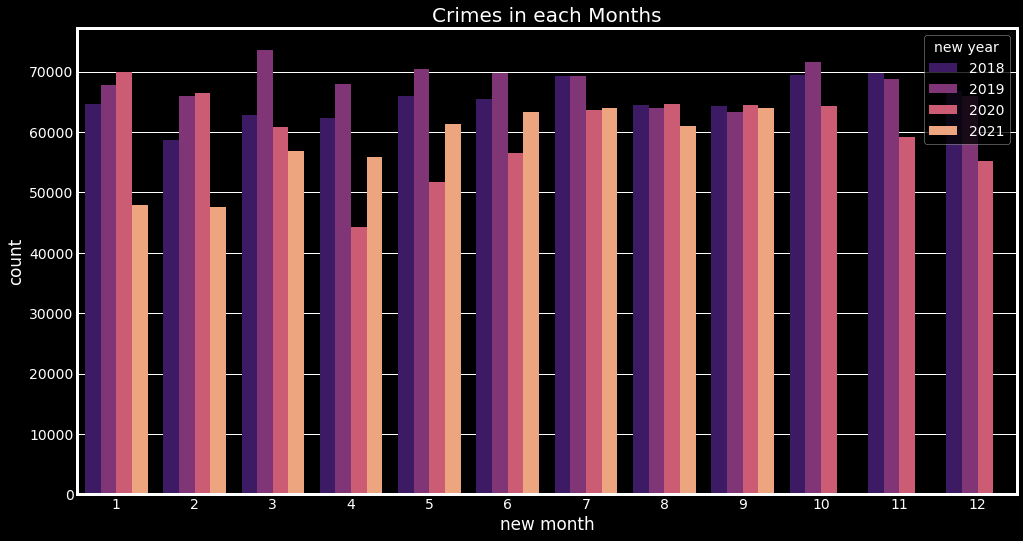

In [92]:
data['month'] = pd.to_datetime(data['month'])

data['new month'] = data['month'].dt.month

#plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (15, 8)

sns.countplot(data['new month'], hue=data['new year'], palette = 'magma')
plt.title('Crimes in each Months', fontsize = 20)

plt.show()

In [22]:
data.tail()

,month,reported by,longitude,latitude,location,lsoa code,lsoa name,crime type,last outcome category,borough_london,stringency,covid,new month,new year
2844236,2021-09-01,Metropolitan Police Service,-0.135532,51.489097,On or near St George'S Square,1004741,Westminster 024F,Theft from the person,Investigation complete; no suspect identified,Westminster,42.034,1,9,2021
2844237,2021-09-01,Metropolitan Police Service,-0.134389,51.488872,On or near Lupus Street,1004741,Westminster 024F,Theft from the person,Under investigation,Westminster,42.034,1,9,2021
2844238,2021-09-01,Metropolitan Police Service,-0.133400,51.489117,On or near Bessborough Street,1004741,Westminster 024F,Violence and sexual offences,Under investigation,Westminster,42.034,1,9,2021
2844239,2021-09-01,Metropolitan Police Service,-0.134389,51.488872,On or near Lupus Street,1004741,Westminster 024F,Violence and sexual offences,Under investigation,Westminster,42.034,1,9,2021
2844240,2021-09-01,Metropolitan Police Service,-0.135532,51.489097,On or near St George'S Square,1004741,Westminster 024F,Violence and sexual offences,Under investigation,Westminster,42.034,1,9,2021


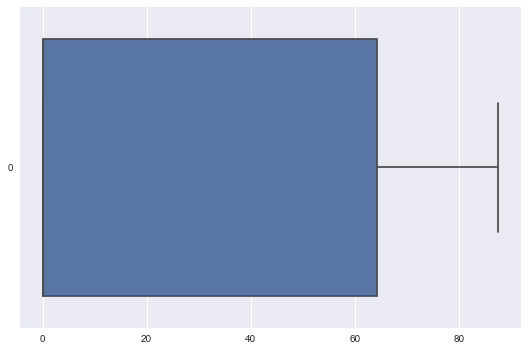

In [157]:
plt.rcParams['figure.figsize'] = (10, 9)
plt.style.use('seaborn')
sns.boxplot(data=data['stringency'], orient="h")
plt.show()

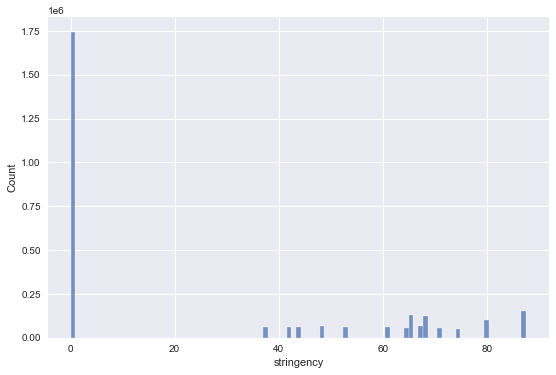

In [158]:
plt.rcParams['figure.figsize'] = (10, 9)
plt.style.use('seaborn')
sns.histplot(data=data['stringency'])
plt.show()

### Plotting Pre Pandemic Period

In [30]:
data_no_s = data[data['stringency'] == 0.0]
data_no_s.head()

,month,reported by,longitude,latitude,location,lsoa code,lsoa name,crime type,last outcome category,borough_london,stringency,covid,new month,new year
0,2018-01-01,Metropolitan Police Service,0.140035,51.589112,On or near Beansland Grove,1000027,Barking and Dagenham 001A,Burglary,Offender sent to prison,Barking and Dagenham,0.0,0,1,2018
1,2018-01-01,Metropolitan Police Service,0.140035,51.589112,On or near Beansland Grove,1000027,Barking and Dagenham 001A,Burglary,Investigation complete; no suspect identified,Barking and Dagenham,0.0,0,1,2018
2,2018-01-01,Metropolitan Police Service,0.135554,51.584985,On or near Rose Lane,1000027,Barking and Dagenham 001A,Burglary,Status update unavailable,Barking and Dagenham,0.0,0,1,2018
3,2018-01-01,Metropolitan Police Service,0.140035,51.589112,On or near Beansland Grove,1000027,Barking and Dagenham 001A,Burglary,Status update unavailable,Barking and Dagenham,0.0,0,1,2018
4,2018-01-01,Metropolitan Police Service,0.135554,51.584985,On or near Rose Lane,1000027,Barking and Dagenham 001A,Criminal damage and arson,Investigation complete; no suspect identified,Barking and Dagenham,0.0,0,1,2018


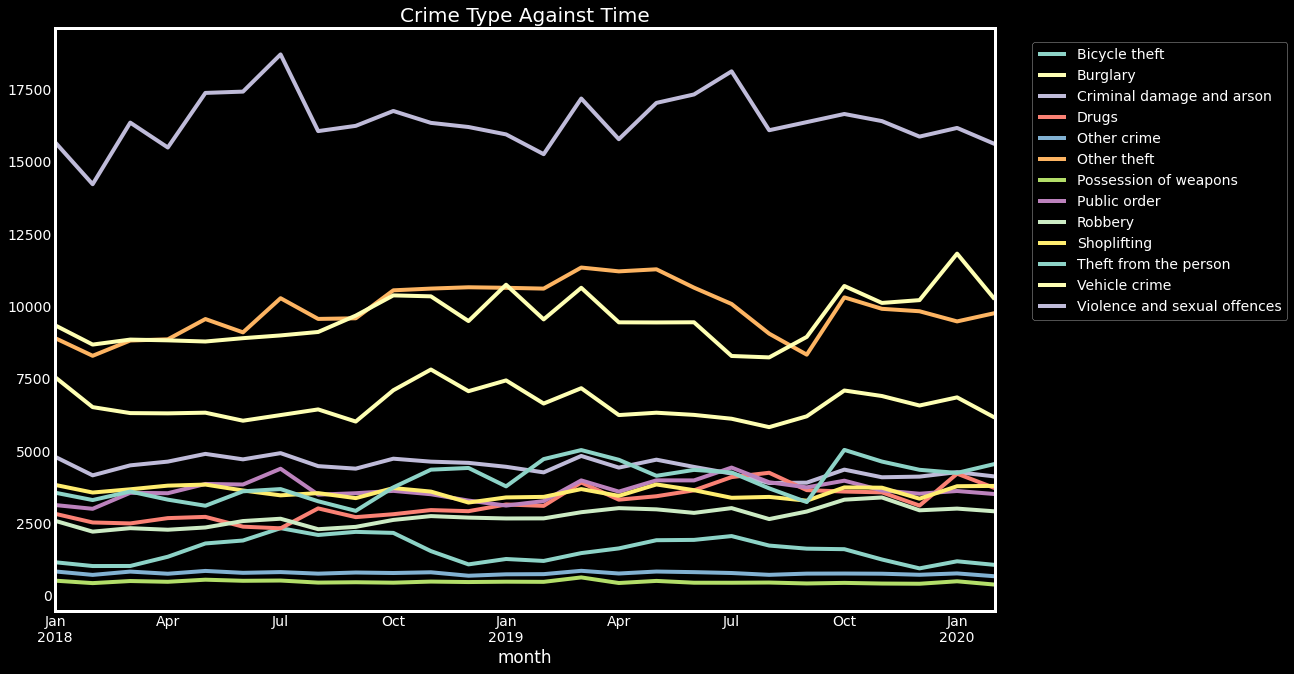

In [33]:
m = data_no_s.groupby(['month', 'crime type']).size().unstack().plot.line(figsize=(15, 10))
plt.grid(b=None)

plt.title('Crime Type Against Time',fontsize = 20)

m.legend(loc=(1.04,0.5))

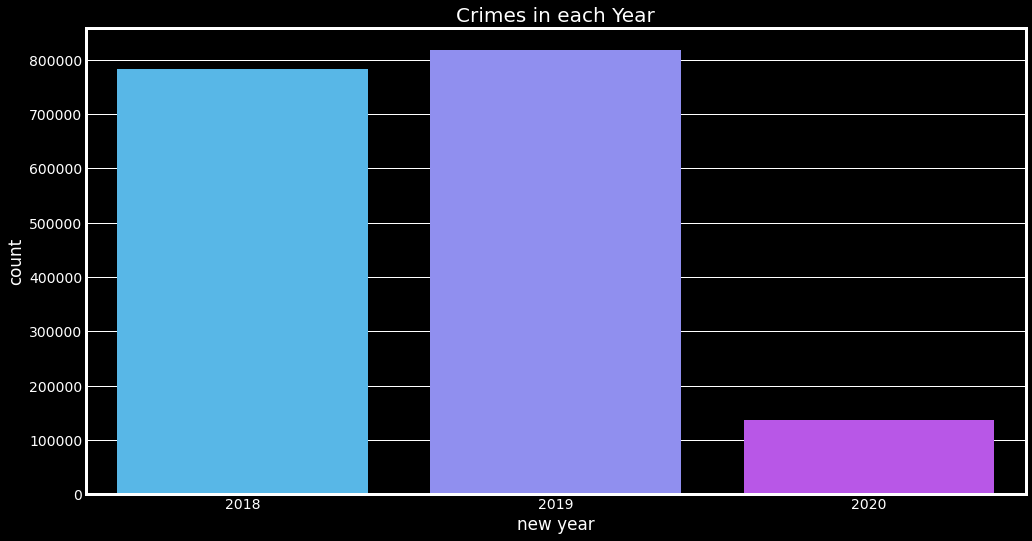

In [34]:
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (15, 8)

sns.countplot(data_no_s['new year'], palette = 'cool',)
plt.title('Crimes in each Year', fontsize = 20)

plt.show()

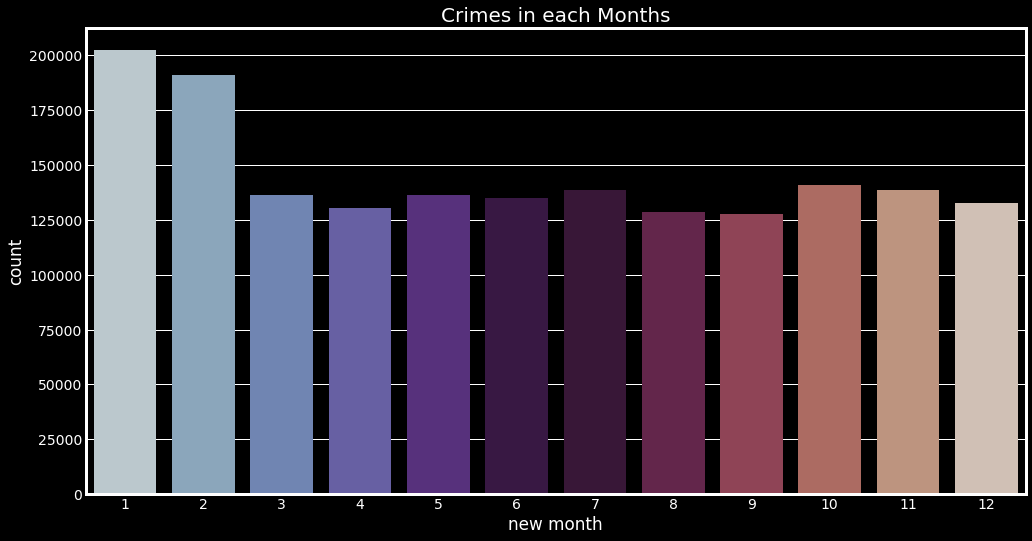

In [35]:
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (15, 8)

sns.countplot(data_no_s['new month'], palette = 'twilight',)
plt.title('Crimes in each Months', fontsize = 20)

plt.show()

### Plotting Pandemic Period Data

In [147]:
#data with stringency(pandemic period)
data_s = data[data['stringency'] > 0.0]
data_s.head()

,month,reported by,longitude,latitude,location,lsoa code,lsoa name,crime type,last outcome category,borough_london,stringency,covid,new month,new year
36963,2020-03-01,Metropolitan Police Service,0.140035,51.589112,On or near Beansland Grove,1000027,Barking and Dagenham 001A,Burglary,Investigation complete; no suspect identified,Barking and Dagenham,37.484,1,3,2020
36964,2020-03-01,Metropolitan Police Service,0.138906,51.588737,On or near Kingston Hill Avenue,1000027,Barking and Dagenham 001A,Burglary,Investigation complete; no suspect identified,Barking and Dagenham,37.484,1,3,2020
36965,2020-03-01,Metropolitan Police Service,0.138906,51.588737,On or near Kingston Hill Avenue,1000027,Barking and Dagenham 001A,Burglary,Investigation complete; no suspect identified,Barking and Dagenham,37.484,1,3,2020
36966,2020-03-01,Metropolitan Police Service,0.135866,51.587336,On or near Gibbfield Close,1000027,Barking and Dagenham 001A,Criminal damage and arson,Court result unavailable,Barking and Dagenham,37.484,1,3,2020
36967,2020-03-01,Metropolitan Police Service,0.145888,51.593835,On or near Providence Place,1000027,Barking and Dagenham 001A,Criminal damage and arson,Court result unavailable,Barking and Dagenham,37.484,1,3,2020


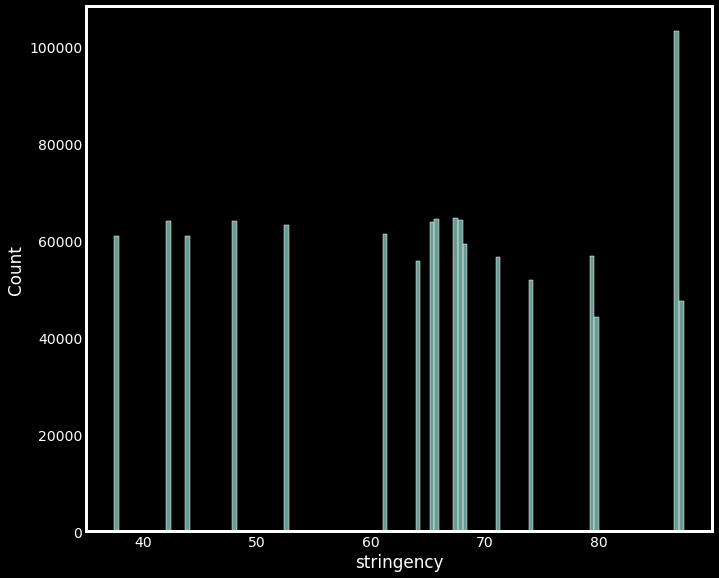

In [148]:
plt.rcParams['figure.figsize'] = (10, 9)
plt.grid(b=None)
sns.histplot(data=data_s['stringency'])
plt.show()

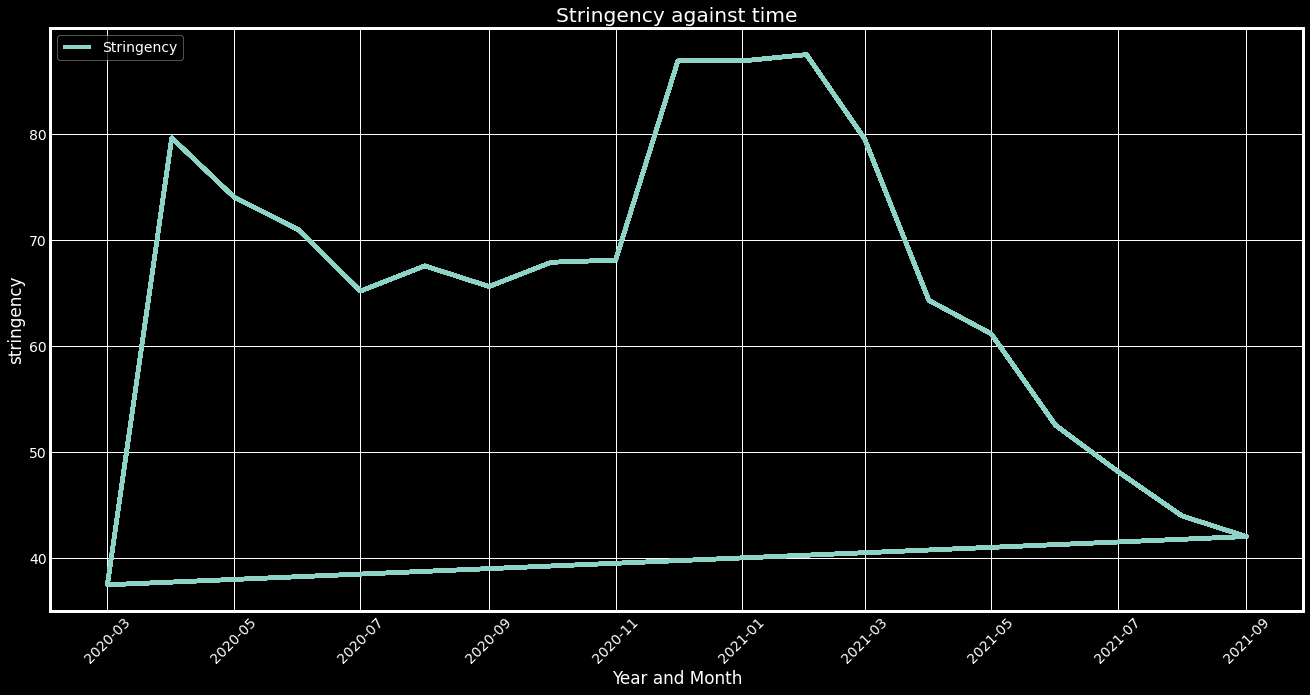

In [154]:
plt.figure(figsize=(20,10))

plt.plot(data_s['month'], data_s['stringency'], label = 'Stringency')

plt.xlabel('Year and Month')
plt.ylabel('stringency')

plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.title('Stringency against time')

plt.show()

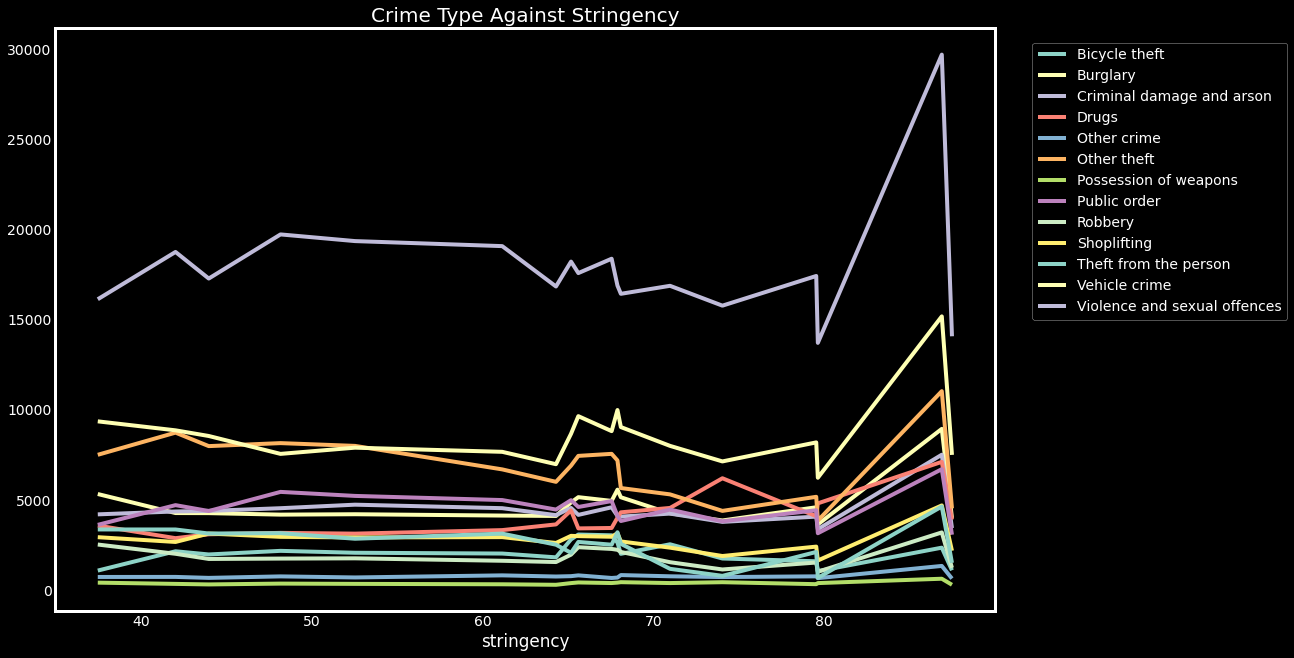

In [25]:
plt.rcParams['figure.figsize'] = (20, 9)
#plt.style.use('seaborn')
plt.style.use('dark_background')

m = data_s.groupby(['stringency', 'crime type']).size().unstack().plot.line(figsize=(15, 10))
plt.grid(b=None)
plt.title('Crime Type Against Stringency',fontsize = 20)
m.legend(loc=(1.04,0.5))

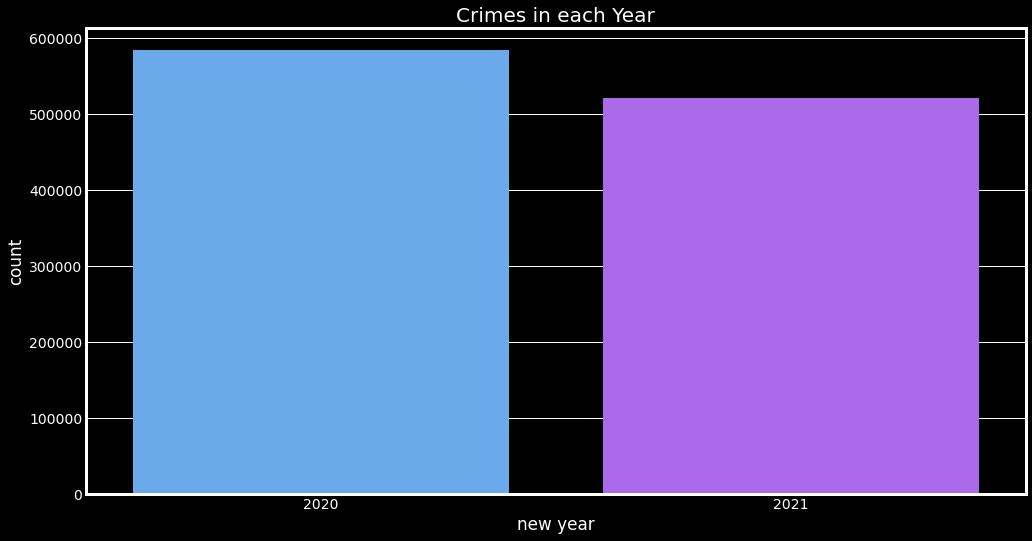

In [26]:
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (15, 8)

sns.countplot(data_s['new year'], palette = 'cool',)
plt.title('Crimes in each Year', fontsize = 20)

plt.show()

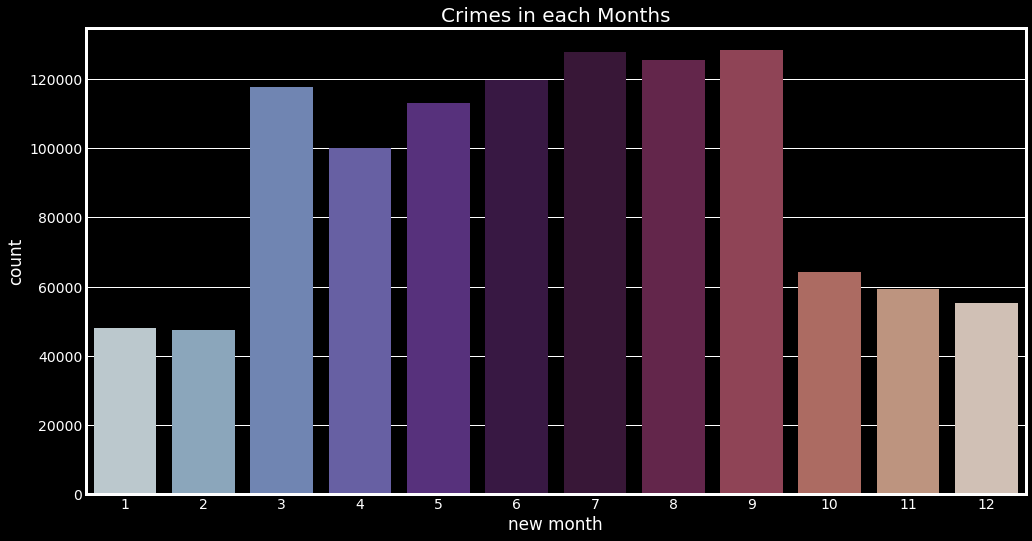

In [27]:
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (15, 8)

sns.countplot(data_s['new month'], palette = 'twilight',)
plt.title('Crimes in each Months', fontsize = 20)

plt.show()

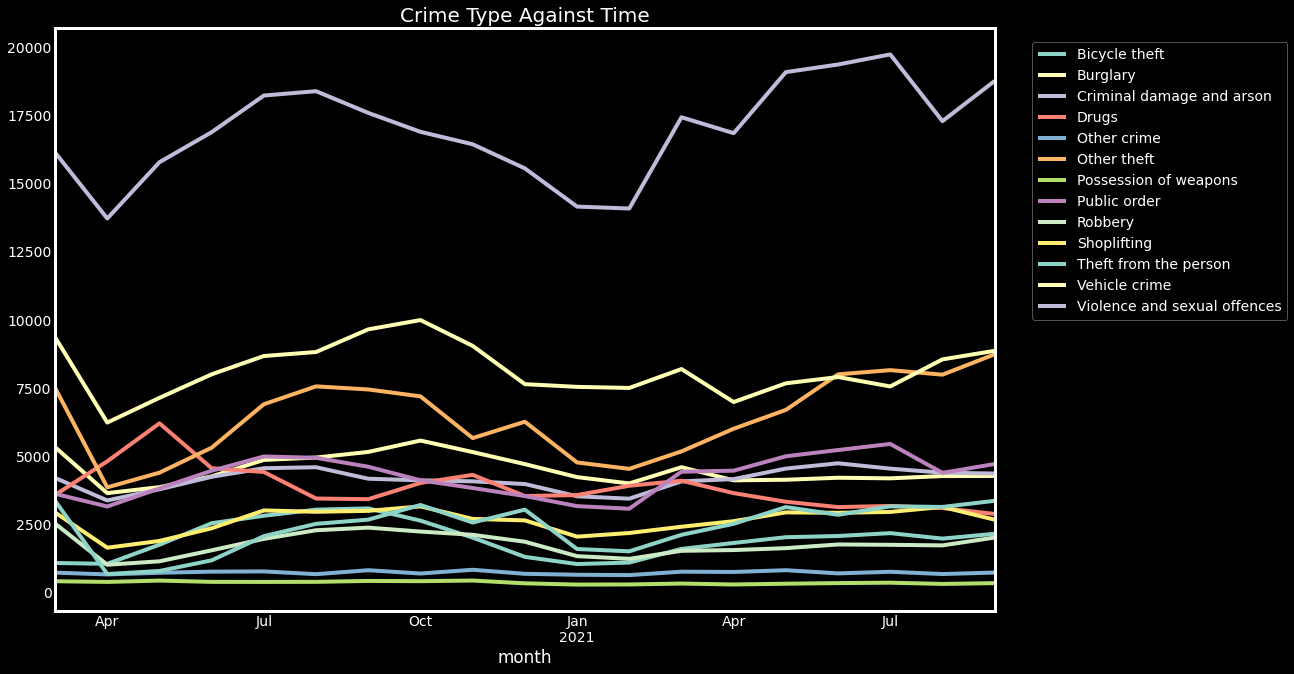

In [28]:
m = data_s.groupby(['month', 'crime type']).size().unstack().plot.line(figsize=(15, 10))
plt.grid(b=None)

plt.title('Crime Type Against Time',fontsize = 20)

m.legend(loc=(1.04,0.5))

In [29]:
#check different crime types reported
x = data_s['crime type'].value_counts()
y = data_s['crime type'].value_counts().count()

print(x)
print('\n')
print("There are are {} categories ".format(y))

Violence and sexual offences    322274
Vehicle crime                   155330
Other theft                     122181
Burglary                         85550
Public order                     81031
Criminal damage and arson        78931
Drugs                            73200
Shoplifting                      50226
Theft from the person            45522
Bicycle theft                    37343
Robbery                          33674
Other crime                      13922
Possession of weapons             6989
Name: crime type, dtype: int64


There are are 13 categories 


### Adding Unemployment factor

In [121]:
new_df = data.groupby(['month', 'crime type']).size().unstack() #data.groupby("month")['crime type'].value_counts().unstack(fill_value=0)
new_df

crime type,Bicycle theft,Burglary,Criminal damage and arson,Drugs,Other crime,Other theft,Possession of weapons,Public order,Robbery,Shoplifting,Theft from the person,Vehicle crime,Violence and sexual offences
month,,,,,,,,,,,,,
2018-01-01,1154,7548,4797,2828,836,8897,518,3130,2586,3826,3557,9339,15663
2018-02-01,1023,6512,4156,2528,717,8285,433,3000,2211,3562,3302,8673,14212
2018-03-01,1025,6306,4501,2495,831,8814,505,3553,2331,3674,3597,8845,16340
2018-04-01,1344,6297,4630,2678,757,8854,479,3538,2277,3800,3316,8819,15480
2018-05-01,1803,6320,4897,2721,854,9555,551,3858,2355,3837,3106,8779,17366
2018-06-01,1905,6043,4708,2383,788,9095,513,3839,2577,3633,3604,8894,17411
2018-07-01,2331,6238,4923,2326,814,10275,522,4384,2657,3465,3681,8989,18696
2018-08-01,2096,6433,4474,3014,760,9559,451,3489,2295,3542,3260,9108,16047
2018-09-01,2203,6014,4387,2712,799,9581,463,3538,2376,3369,2929,9673,16228


In [122]:
stringency = data[['month', 'stringency']].drop_duplicates()
stringency

,month,stringency
0,2018-01-01,0.000000
1395,2018-02-01,0.000000
2713,2018-03-01,0.000000
4175,2018-04-01,0.000000
5503,2018-05-01,0.000000
6868,2018-06-01,0.000000
8300,2018-07-01,0.000000
9781,2018-08-01,0.000000
11107,2018-09-01,0.000000
12427,2018-10-01,0.000000


In [123]:
stringency['month'] = stringency['month'].dt.strftime('%Y-%m')

In [124]:
stringency

,month,stringency
0,2018-01,0.000000
1395,2018-02,0.000000
2713,2018-03,0.000000
4175,2018-04,0.000000
5503,2018-05,0.000000
6868,2018-06,0.000000
8300,2018-07,0.000000
9781,2018-08,0.000000
11107,2018-09,0.000000
12427,2018-10,0.000000


In [125]:
new_sum_col = list(new_df.sum(axis=1))
new_df['total crimes per month'] = new_sum_col
new_df

crime type,Bicycle theft,Burglary,Criminal damage and arson,Drugs,Other crime,Other theft,Possession of weapons,Public order,Robbery,Shoplifting,Theft from the person,Vehicle crime,Violence and sexual offences,total crimes per month
month,,,,,,,,,,,,,,
2018-01-01,1154,7548,4797,2828,836,8897,518,3130,2586,3826,3557,9339,15663,64679
2018-02-01,1023,6512,4156,2528,717,8285,433,3000,2211,3562,3302,8673,14212,58614
2018-03-01,1025,6306,4501,2495,831,8814,505,3553,2331,3674,3597,8845,16340,62817
2018-04-01,1344,6297,4630,2678,757,8854,479,3538,2277,3800,3316,8819,15480,62269
2018-05-01,1803,6320,4897,2721,854,9555,551,3858,2355,3837,3106,8779,17366,66002
2018-06-01,1905,6043,4708,2383,788,9095,513,3839,2577,3633,3604,8894,17411,65393
2018-07-01,2331,6238,4923,2326,814,10275,522,4384,2657,3465,3681,8989,18696,69301
2018-08-01,2096,6433,4474,3014,760,9559,451,3489,2295,3542,3260,9108,16047,64528
2018-09-01,2203,6014,4387,2712,799,9581,463,3538,2376,3369,2929,9673,16228,64272


In [126]:
# saving the dataframe
new_df.to_csv('data/collapsed_data1.csv', index='month')

In [127]:
new_df2 = pd.read_csv('data/collapsed_data.csv')
new_df2

,month,Bicycle theft,Burglary,Criminal damage and arson,Drugs,Other crime,Other theft,Possession of weapons,Public order,Robbery,Shoplifting,Theft from the person,Vehicle crime,Violence and sexual offences,total crimes per month
0,2018-01,1155,7554,4802,2832,840,8907,518,3133,2587,3829,3560,9344,15706,64767
1,2018-02,1023,6518,4157,2531,721,8302,436,3005,2213,3562,3303,8694,14246,58711
2,2018-03,1025,6310,4509,2500,836,8832,510,3560,2331,3674,3601,8865,16386,62939
3,2018-04,1344,6300,4633,2681,761,8871,481,3543,2278,3801,3317,8824,15504,62338
4,2018-05,1803,6326,4905,2730,858,9582,552,3864,2359,3838,3109,8794,17433,66153
5,2018-06,1907,6048,4711,2391,791,9112,519,3844,2579,3635,3605,8912,17452,65506
6,2018-07,2333,6243,4926,2331,820,10303,524,4390,2658,3466,3683,9009,18748,69434
7,2018-08,2097,6438,4486,3019,762,9601,452,3495,2296,3544,3266,9134,16129,64719
8,2018-09,2204,6017,4390,2716,802,9604,465,3543,2378,3370,2938,9684,16268,64379
9,2018-10,2171,7101,4735,2815,785,10562,449,3623,2619,3716,3741,10392,16777,69486


In [128]:
new_df2['month'] = pd.to_datetime(new_df2.month)

In [132]:
stringency['month'] = pd.to_datetime(stringency.month)

In [133]:
new_df2 = pd.merge(new_df2, stringency, on="month", how="inner")
new_df2

,month,Bicycle theft,Burglary,Criminal damage and arson,Drugs,Other crime,Other theft,Possession of weapons,Public order,Robbery,Shoplifting,Theft from the person,Vehicle crime,Violence and sexual offences,total crimes per month,stringency
0,2018-01-01,1155,7554,4802,2832,840,8907,518,3133,2587,3829,3560,9344,15706,64767,0.000000
1,2018-02-01,1023,6518,4157,2531,721,8302,436,3005,2213,3562,3303,8694,14246,58711,0.000000
2,2018-03-01,1025,6310,4509,2500,836,8832,510,3560,2331,3674,3601,8865,16386,62939,0.000000
3,2018-04-01,1344,6300,4633,2681,761,8871,481,3543,2278,3801,3317,8824,15504,62338,0.000000
4,2018-05-01,1803,6326,4905,2730,858,9582,552,3864,2359,3838,3109,8794,17433,66153,0.000000
5,2018-06-01,1907,6048,4711,2391,791,9112,519,3844,2579,3635,3605,8912,17452,65506,0.000000
6,2018-07-01,2333,6243,4926,2331,820,10303,524,4390,2658,3466,3683,9009,18748,69434,0.000000
7,2018-08-01,2097,6438,4486,3019,762,9601,452,3495,2296,3544,3266,9134,16129,64719,0.000000
8,2018-09-01,2204,6017,4390,2716,802,9604,465,3543,2378,3370,2938,9684,16268,64379,0.000000
9,2018-10-01,2171,7101,4735,2815,785,10562,449,3623,2619,3716,3741,10392,16777,69486,0.000000


In [134]:
data1 = pd.read_csv('data/unemployment-london-region.csv')
data1

,month,Numbers ('000s),Rates (%)
0,Jan-18,247,5.0
1,Feb-18,239,4.8
2,Mar-18,247,4.9
3,Apr-18,260,5.2
4,May-18,255,5.1
5,Jun-18,242,4.9
6,Jul-18,235,4.7
7,Aug-18,237,4.8
8,Sep-18,234,4.7
9,Oct-18,236,4.7


In [135]:
import datetime as dt
data1['month'] = data1['month'].apply(lambda x: dt.datetime.strptime(x,'%b-%y') if type(x)==str else pd.NaT)

In [136]:
data1['month'] = data1['month'].dt.strftime('%Y-%m')

In [137]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   month            45 non-null     object 
 1   Numbers ('000s)  45 non-null     int64  
 2   Rates (%)        45 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.2+ KB


In [138]:
data1['month'] = pd.to_datetime(data1.month)

In [139]:
#Merge the unemployment df with crime df

df = pd.merge(new_df2, data1, on="month", how="inner")
df

,month,Bicycle theft,Burglary,Criminal damage and arson,Drugs,Other crime,Other theft,Possession of weapons,Public order,Robbery,Shoplifting,Theft from the person,Vehicle crime,Violence and sexual offences,total crimes per month,stringency,Numbers ('000s),Rates (%)
0,2018-01-01,1155,7554,4802,2832,840,8907,518,3133,2587,3829,3560,9344,15706,64767,0.000000,247,5.0
1,2018-02-01,1023,6518,4157,2531,721,8302,436,3005,2213,3562,3303,8694,14246,58711,0.000000,239,4.8
2,2018-03-01,1025,6310,4509,2500,836,8832,510,3560,2331,3674,3601,8865,16386,62939,0.000000,247,4.9
3,2018-04-01,1344,6300,4633,2681,761,8871,481,3543,2278,3801,3317,8824,15504,62338,0.000000,260,5.2
4,2018-05-01,1803,6326,4905,2730,858,9582,552,3864,2359,3838,3109,8794,17433,66153,0.000000,255,5.1
5,2018-06-01,1907,6048,4711,2391,791,9112,519,3844,2579,3635,3605,8912,17452,65506,0.000000,242,4.9
6,2018-07-01,2333,6243,4926,2331,820,10303,524,4390,2658,3466,3683,9009,18748,69434,0.000000,235,4.7
7,2018-08-01,2097,6438,4486,3019,762,9601,452,3495,2296,3544,3266,9134,16129,64719,0.000000,237,4.8
8,2018-09-01,2204,6017,4390,2716,802,9604,465,3543,2378,3370,2938,9684,16268,64379,0.000000,234,4.7
9,2018-10-01,2171,7101,4735,2815,785,10562,449,3623,2619,3716,3741,10392,16777,69486,0.000000,236,4.7


In [140]:
df.columns = map(str.lower, df.columns)

In [141]:
#Rename columns
df = df.rename(columns={"numbers ('000s)":"unemployment numbers(000s)",
            
                   "rates (%)":"unemployment rate(%)"
                   })
df

,month,bicycle theft,burglary,criminal damage and arson,drugs,other crime,other theft,possession of weapons,public order,robbery,shoplifting,theft from the person,vehicle crime,violence and sexual offences,total crimes per month,stringency,unemployment numbers(000s),unemployment rate(%)
0,2018-01-01,1155,7554,4802,2832,840,8907,518,3133,2587,3829,3560,9344,15706,64767,0.000000,247,5.0
1,2018-02-01,1023,6518,4157,2531,721,8302,436,3005,2213,3562,3303,8694,14246,58711,0.000000,239,4.8
2,2018-03-01,1025,6310,4509,2500,836,8832,510,3560,2331,3674,3601,8865,16386,62939,0.000000,247,4.9
3,2018-04-01,1344,6300,4633,2681,761,8871,481,3543,2278,3801,3317,8824,15504,62338,0.000000,260,5.2
4,2018-05-01,1803,6326,4905,2730,858,9582,552,3864,2359,3838,3109,8794,17433,66153,0.000000,255,5.1
5,2018-06-01,1907,6048,4711,2391,791,9112,519,3844,2579,3635,3605,8912,17452,65506,0.000000,242,4.9
6,2018-07-01,2333,6243,4926,2331,820,10303,524,4390,2658,3466,3683,9009,18748,69434,0.000000,235,4.7
7,2018-08-01,2097,6438,4486,3019,762,9601,452,3495,2296,3544,3266,9134,16129,64719,0.000000,237,4.8
8,2018-09-01,2204,6017,4390,2716,802,9604,465,3543,2378,3370,2938,9684,16268,64379,0.000000,234,4.7
9,2018-10-01,2171,7101,4735,2815,785,10562,449,3623,2619,3716,3741,10392,16777,69486,0.000000,236,4.7


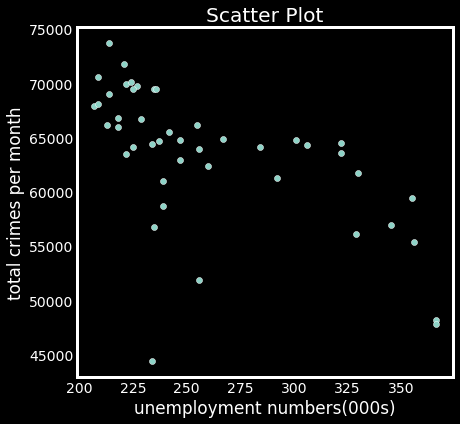

In [142]:
plt.figure(figsize=(6,6))
sns.scatterplot(df["unemployment numbers(000s)"], df['total crimes per month'])
plt.title('Scatter Plot')
plt.grid(False)
plt.show()

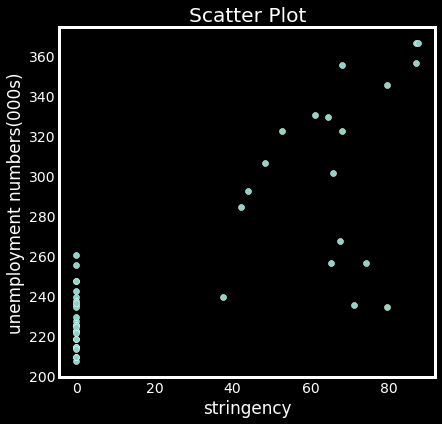

In [157]:
plt.figure(figsize=(6,6))
sns.scatterplot(df['stringency'],df["unemployment numbers(000s)"])
plt.title('Scatter Plot')
plt.grid(False)
plt.show()

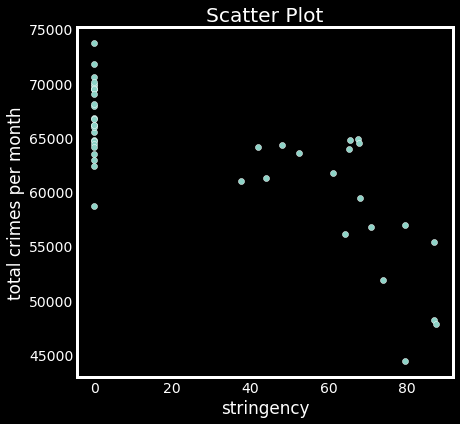

In [158]:
plt.figure(figsize=(6,6))
sns.scatterplot(df['stringency'],df["total crimes per month"])
plt.title('Scatter Plot')
plt.grid(False)
plt.show()

In [172]:
columns_num = df.describe().columns.tolist()  # numeric variables
columns_num

['bicycle theft',
 'burglary',
 'criminal damage and arson',
 'drugs',
 'other crime',
 'other theft',
 'possession of weapons',
 'public order',
 'robbery',
 'shoplifting',
 'theft from the person',
 'vehicle crime',
 'violence and sexual offences',
 'total crimes per month',
 'stringency',
 'unemployment numbers(000s)']

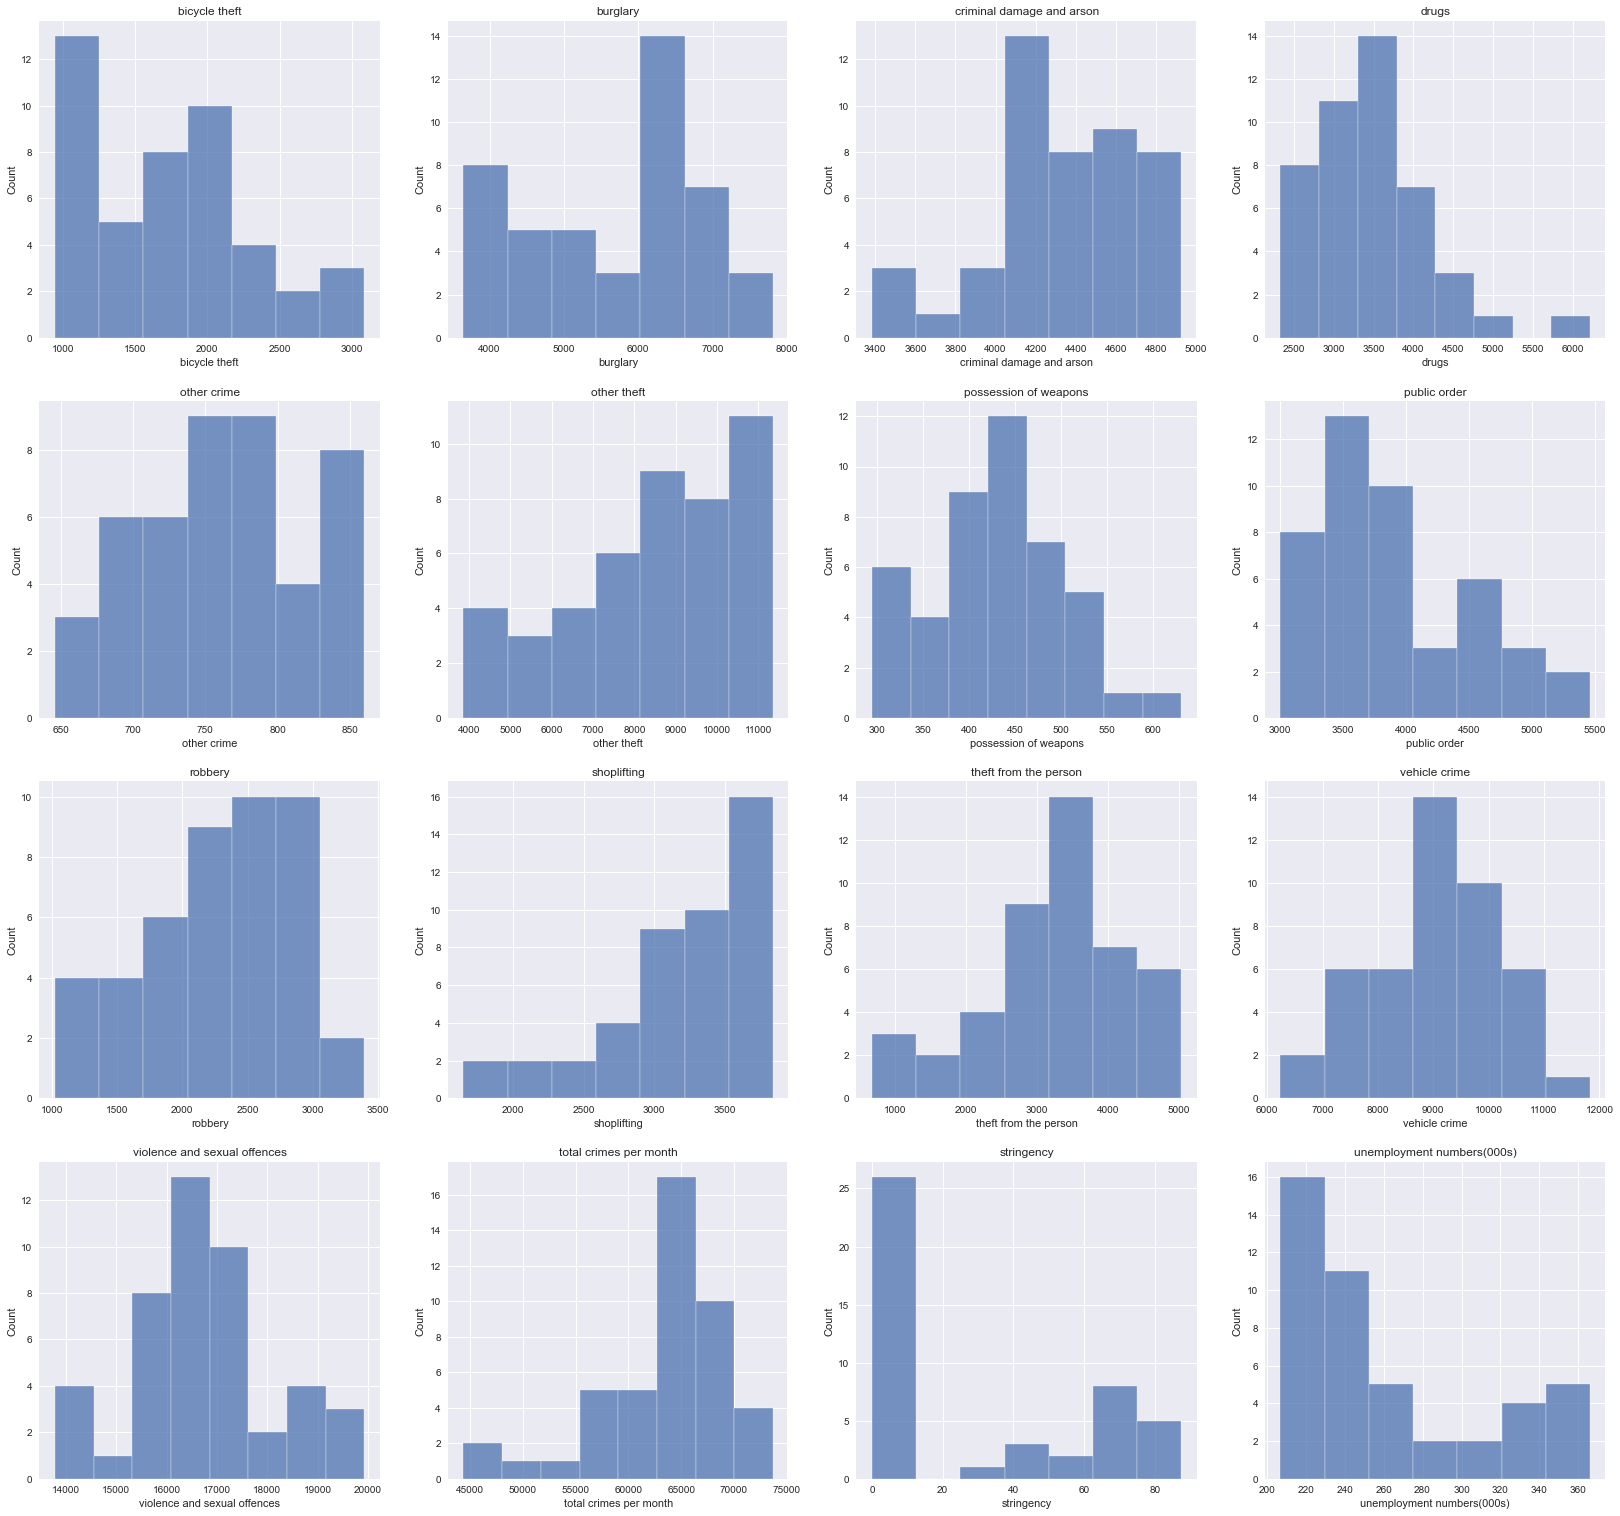

In [177]:
# Histograms for each 
plt.style.use('seaborn')
fig, ax = plt.subplots(4, 4, figsize=(25,25))
ax = ax.flatten()
for i, _ in enumerate(columns_num):
    sns.histplot(data=df[columns_num[i]], ax=ax[i])
    ax[i].set_title(columns_num[i])
plt.show()

In [ ]:
# Boxplots
fig, axs = plt.subplots(4, 4, figsize=(25,5))
for i, _ in enumerate(columns_num):
    sns.boxplot(data=df[columns_num[i]], ax=axs[i], orient="h")
    axs[i].set_title(columns_num[i])
plt.show()

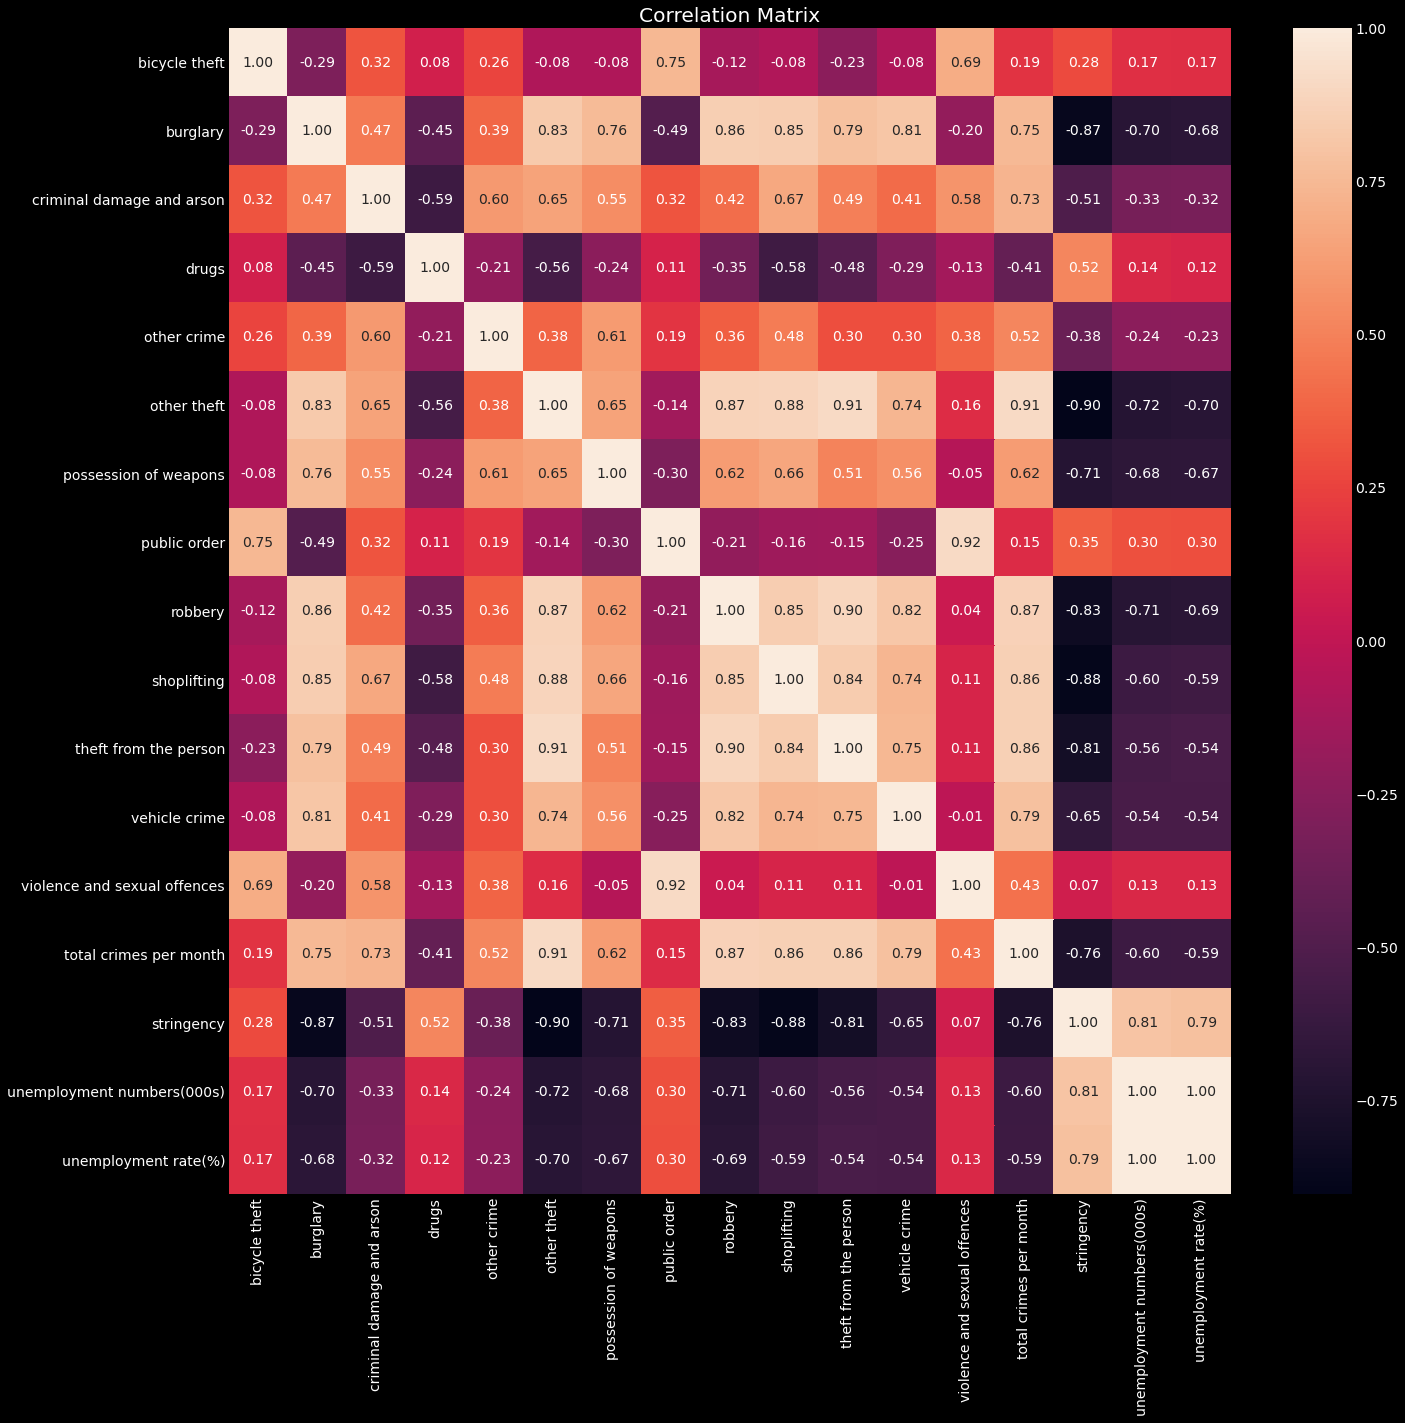

In [143]:
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, ax=ax, fmt='.2f', color='purple')
plt.title('Correlation Matrix')
plt.show()
f.savefig('Data Correlation Matrix')

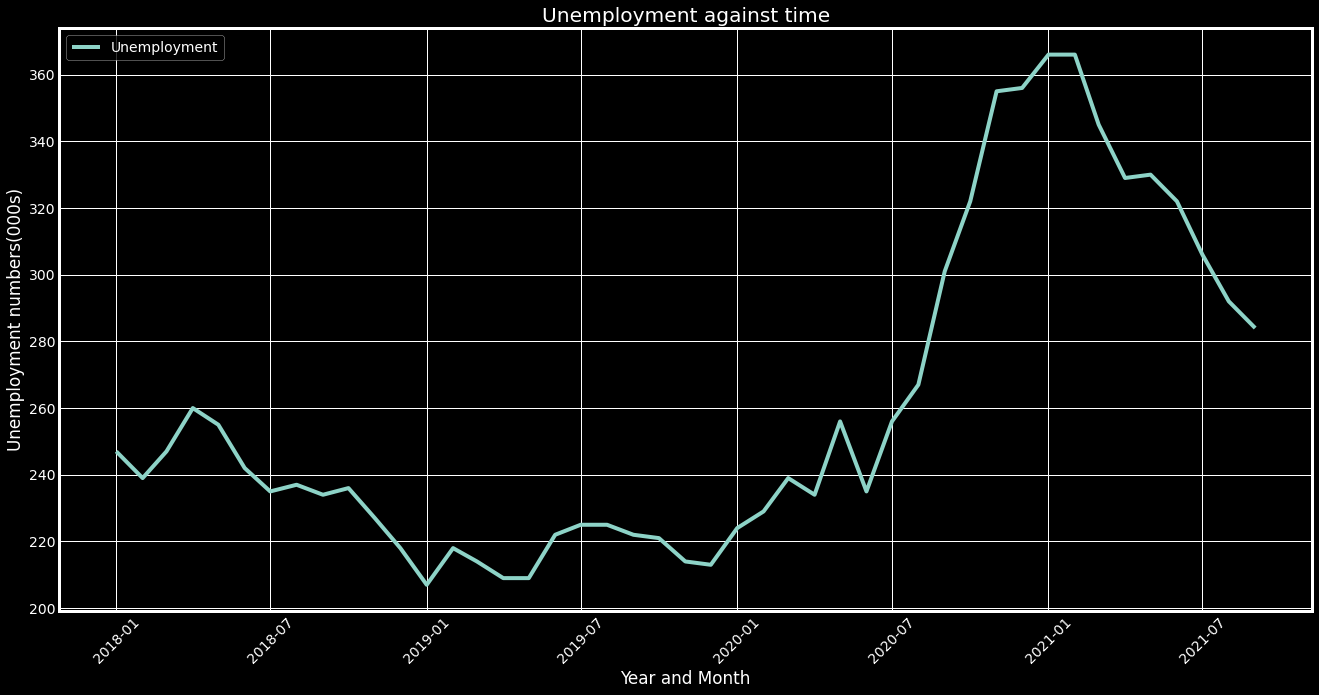

In [144]:
plt.figure(figsize=(20,10))

plt.plot(df['month'], df["unemployment numbers(000s)"], label = 'Unemployment')

plt.xlabel('Year and Month')
plt.ylabel('Unemployment numbers(000s)')

plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.title('Unemployment against time')

plt.show()

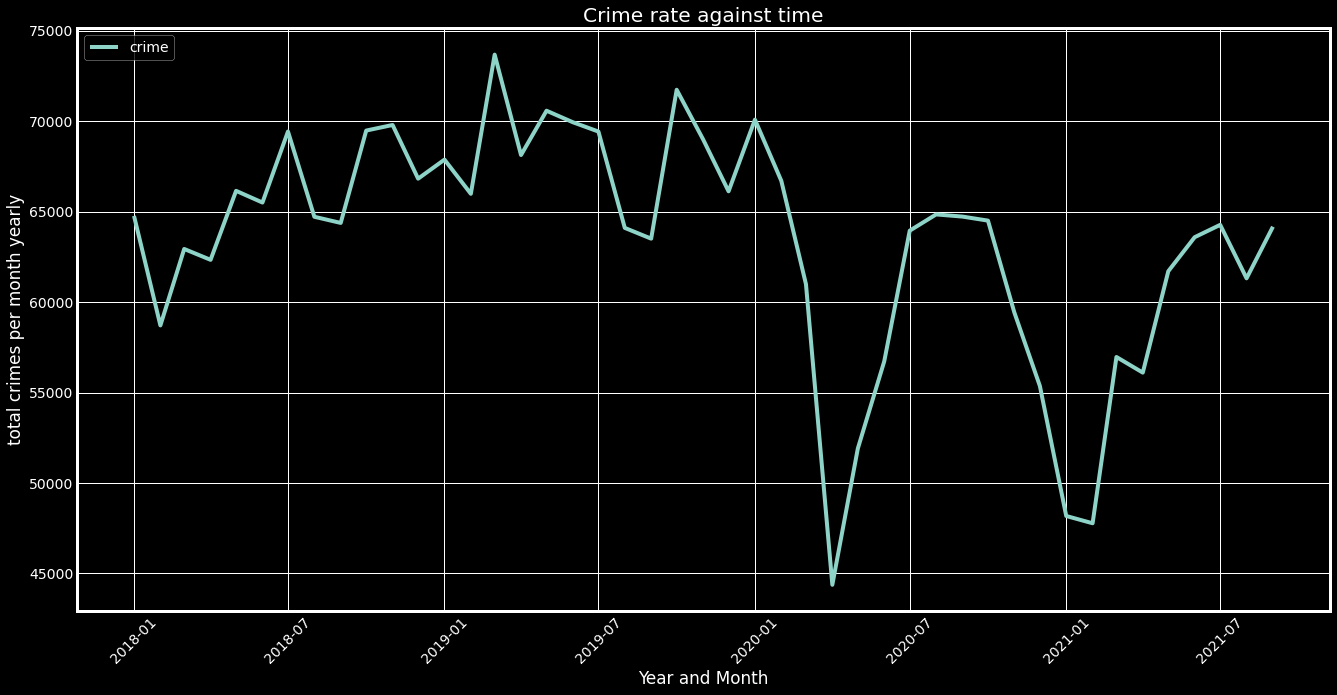

In [145]:
plt.figure(figsize=(20,10))

plt.plot(df['month'], df['total crimes per month'], label = 'crime')

plt.xlabel('Year and Month')
plt.ylabel('total crimes per month yearly')

plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.title('Crime rate against time')
plt.show()

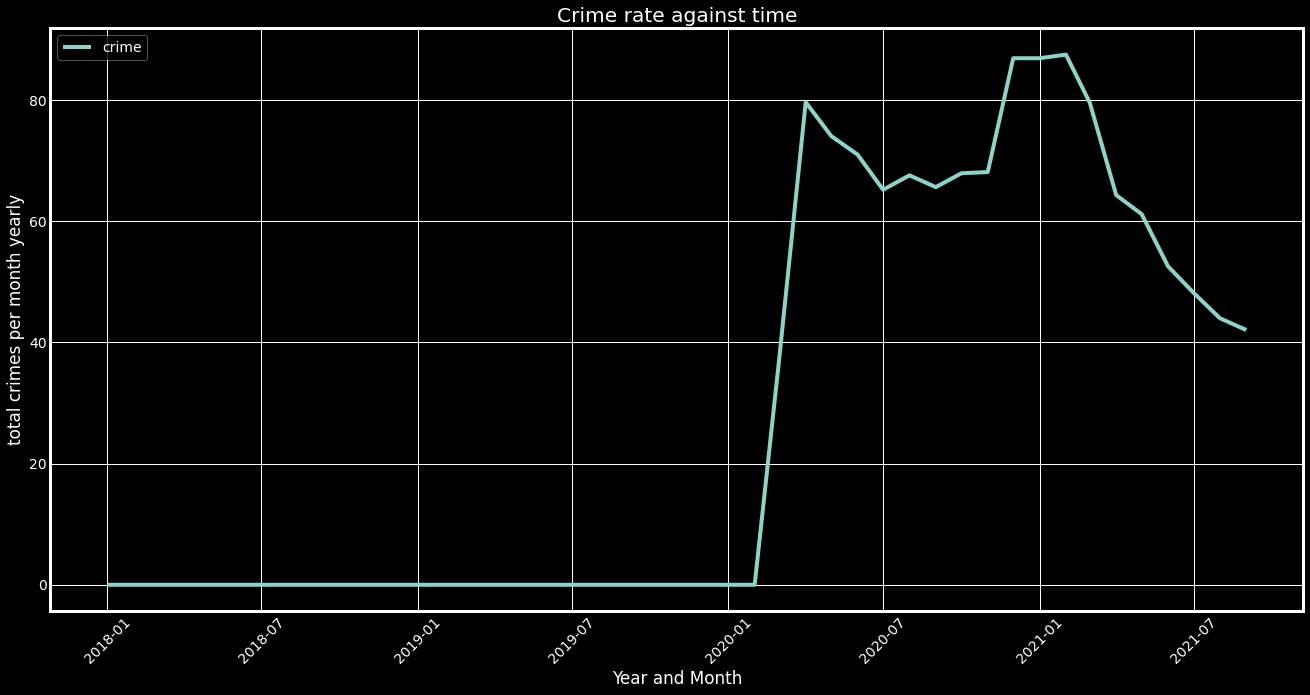

In [153]:
plt.figure(figsize=(20,10))

plt.plot(df['month'], df['stringency'], label = 'crime')

plt.xlabel('Year and Month')
plt.ylabel('total crimes per month yearly')

plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.title('Crime rate against time')
plt.show()